##PROJECT ON PREDICTION OF ACCIDENT SEVERITY IN KUMASI

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 96.0 MB/s eta 0

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 57.8 MB/s eta 0:00:00


In [ ]:
#Setting up the environment by importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.regression import *
from pycaret.classification import *
import sweetviz as sv
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data

##Objective 1: Effect of Geometric characteristics of the road on Accident Severity

In [ ]:
#Import dataset
dataset = get_data('AboboyaaAccidentObj1')

,ACCIDENT_SEVERITY,ROAD_DESCRIPTION,ROAD_SEPARATION_Median,ROAD_SEPARATION_No_Median,LOCATION_TYPE
0,Injured_Not-Hospitalised,Straight_and_flat,1.0,0.0,T_intersection
1,Damage_Only,Straight_and_flat,0.0,1.0,Not_at_junction
2,Hospitalised,Straight_and_flat,0.0,1.0,Not_at_junction
3,Hospitalised,Straight_and_flat,0.0,1.0,Not_at_junction
4,Hospitalised,Straight_and_flat,0.0,1.0,Not_at_junction


In [ ]:
#check the shape of data
dataset.shape


(659, 5)

In [ ]:
#Dataset Features
dataset.dtypes

ACCIDENT_SEVERITY             object
ROAD_DESCRIPTION              object
ROAD_SEPARATION_Median       float64
ROAD_SEPARATION_No_Median    float64
LOCATION_TYPE                 object
dtype: object

In [ ]:
#Check for missing values
print(dataset.isnull().sum())

ACCIDENT_SEVERITY            0
ROAD_DESCRIPTION             0
ROAD_SEPARATION_Median       1
ROAD_SEPARATION_No_Median    1
LOCATION_TYPE                0
dtype: int64


                                             |          | [  0%]   00:00 -> (? left)


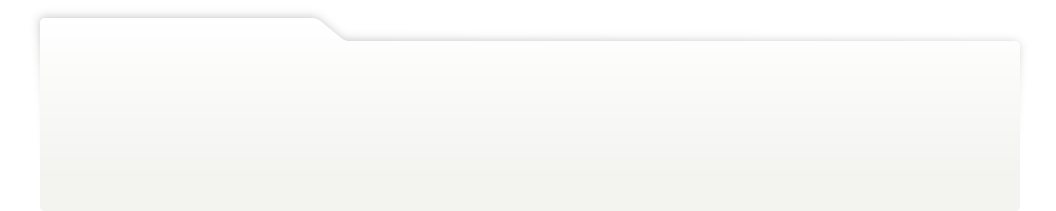
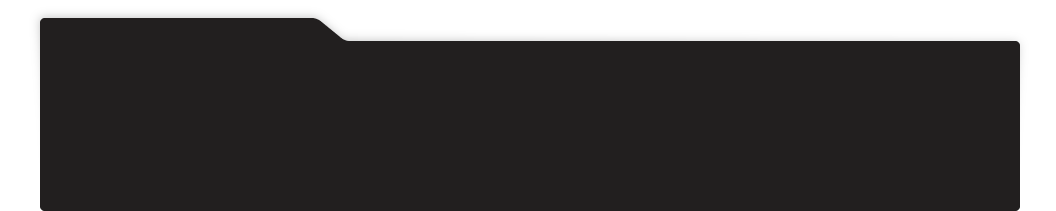
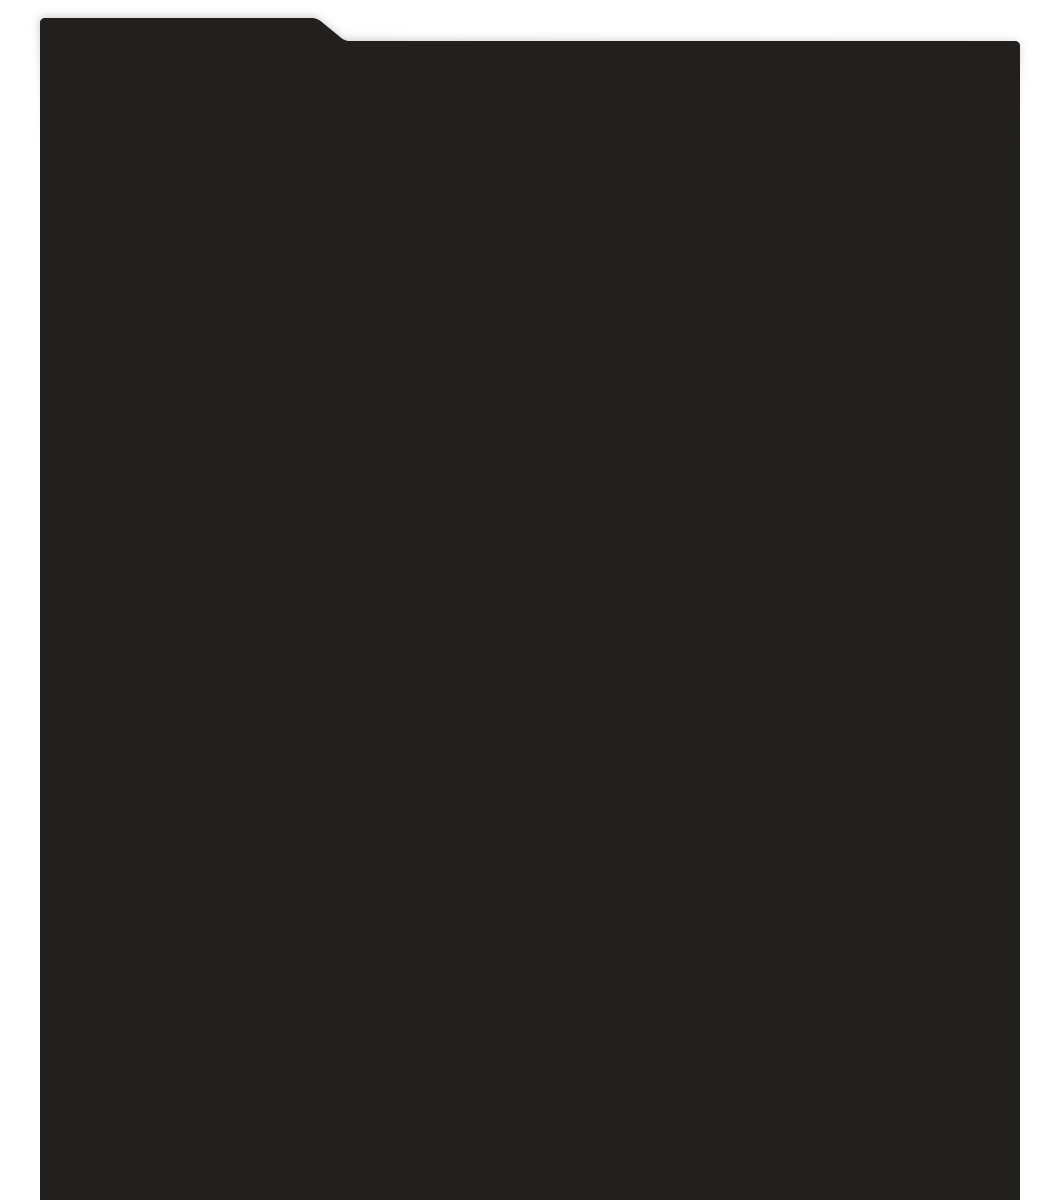
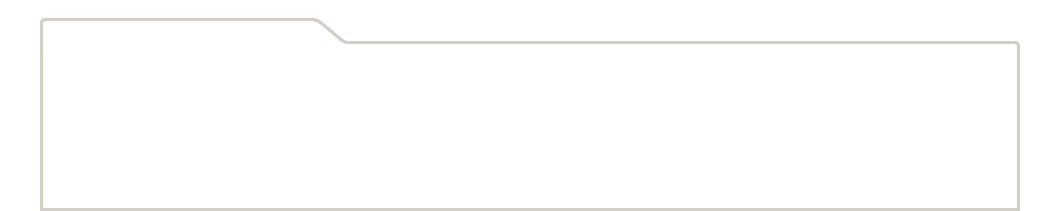
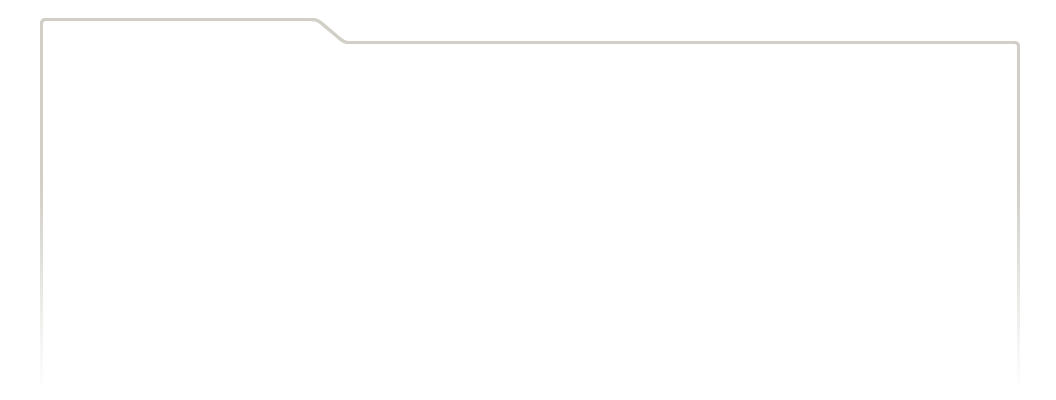
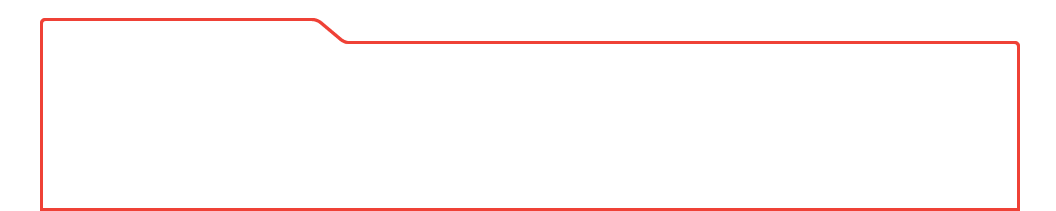
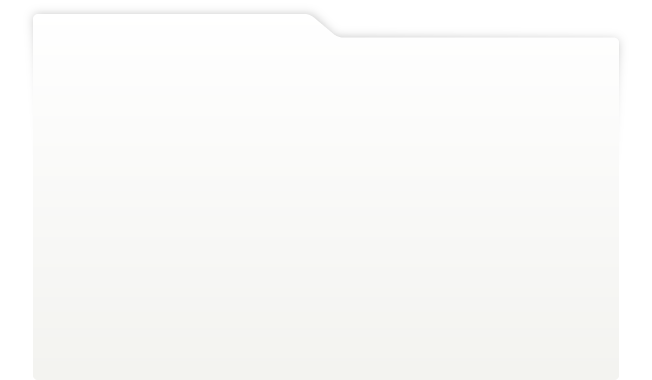
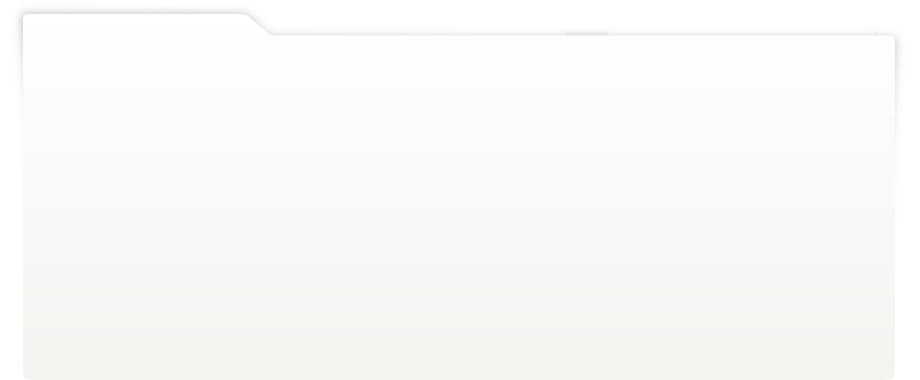
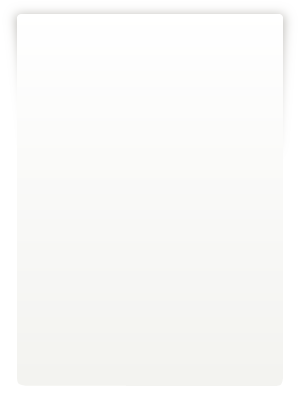
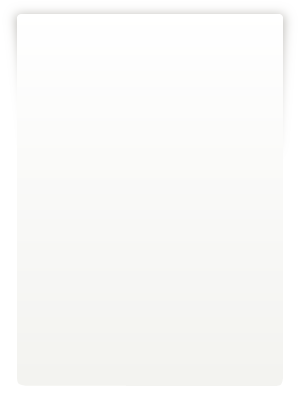
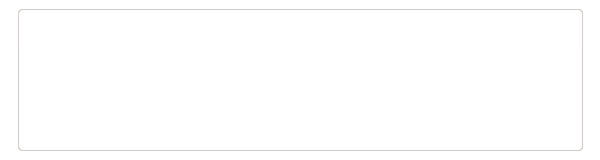
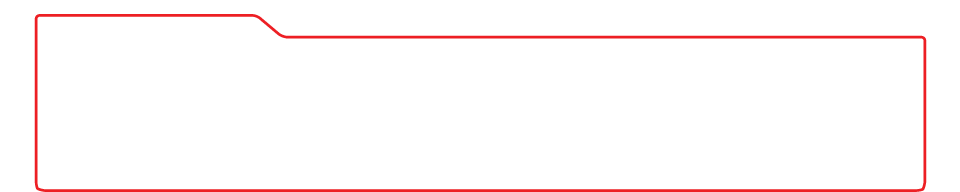
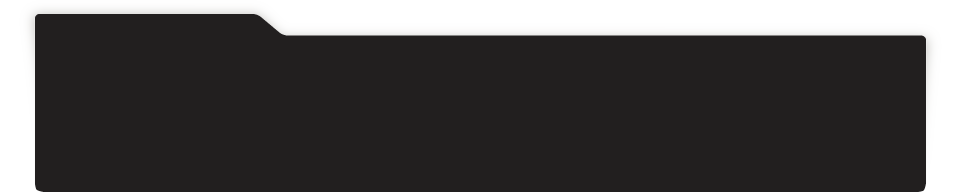
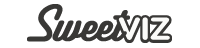
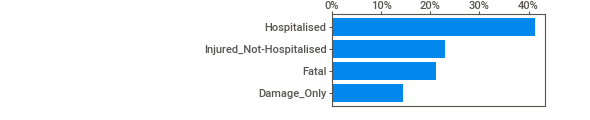
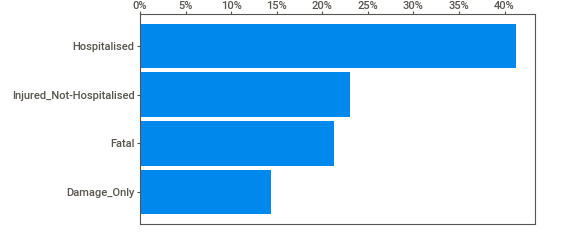
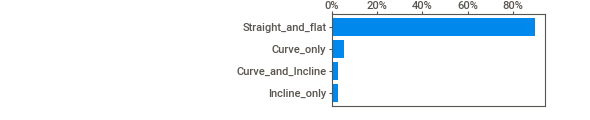
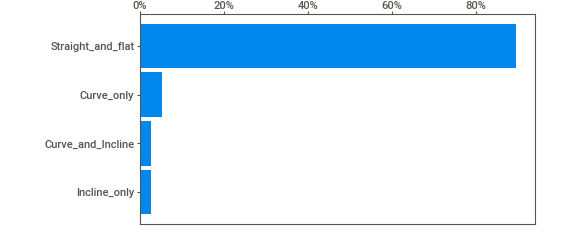
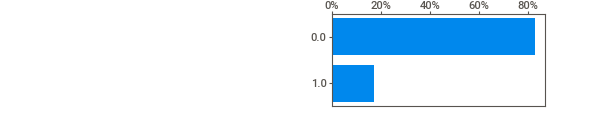
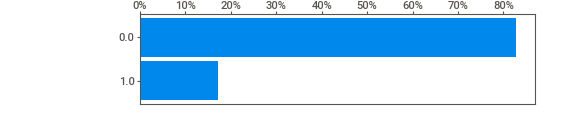
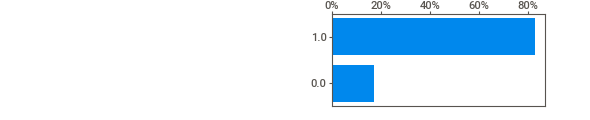
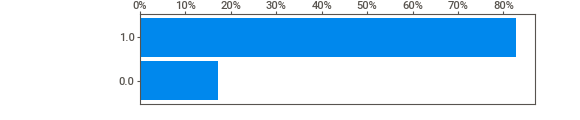
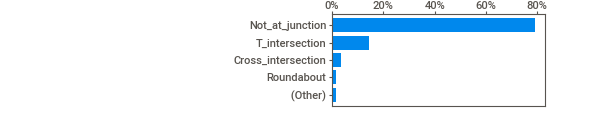
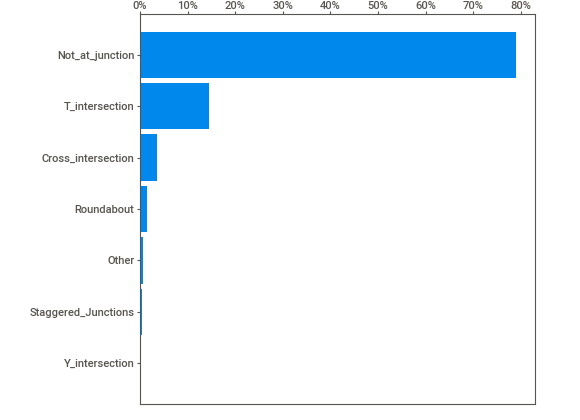
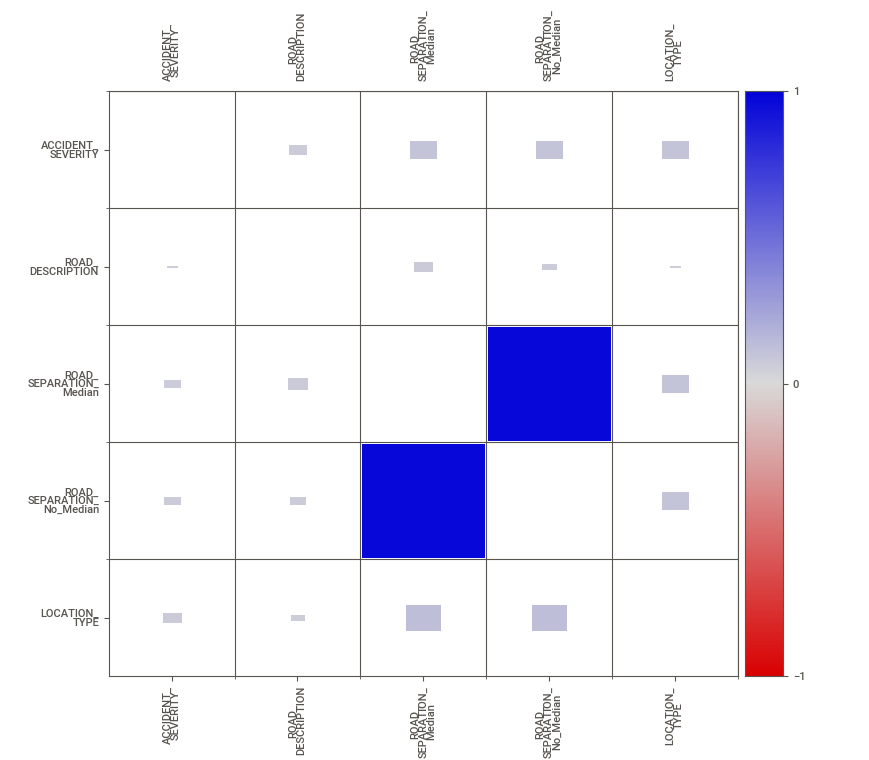
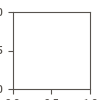

In [ ]:
#EDA
eda_data=sv.analyze(dataset)
eda_data.show_notebook(layout="vertical",w=900,h=700,scale=0.8)

In [ ]:
#Splitting data into train and test data
data = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (593, 5)
Unseen Data For Predictions: (66, 5)


In [ ]:
#setting up environment
exp_mclf101 = setup(data = data, target = 'ACCIDENT_SEVERITY', session_id=123)

,Description,Value
0,Session id,123
1,Target,ACCIDENT_SEVERITY
2,Target type,Multiclass
3,Target mapping,"Damage_Only: 0, Fatal: 1, Hospitalised: 2, Injured_Not-Hospitalised: 3"
4,Original data shape,"(593, 5)"
5,Transformed data shape,"(593, 12)"
6,Transformed train set shape,"(415, 12)"
7,Transformed test set shape,"(178, 12)"
8,Numeric features,2
9,Categorical features,2


In [ ]:
#Compare models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.4217,0.5561,0.4217,0.3570,0.3068,0.0401,0.0686,0.7800
dummy,Dummy Classifier,0.4192,0.5000,0.4192,0.1758,0.2477,0.0000,0.0000,0.3390
ridge,Ridge Classifier,0.4120,0.0000,0.4120,0.3357,0.3088,0.0417,0.0793,0.2050
ada,Ada Boost Classifier,0.4073,0.5465,0.4073,0.3290,0.3039,0.0308,0.0514,0.3420
lightgbm,Light Gradient Boosting Machine,0.4023,0.5448,0.4023,0.3352,0.3013,0.0222,0.0319,0.5270
lda,Linear Discriminant Analysis,0.3974,0.5526,0.3974,0.3437,0.3072,0.0297,0.0531,0.4020
rf,Random Forest Classifier,0.3952,0.5279,0.3952,0.3576,0.3109,0.0233,0.0345,0.4240
xgboost,Extreme Gradient Boosting,0.3951,0.5315,0.3951,0.3509,0.3077,0.0209,0.0331,0.3200
dt,Decision Tree Classifier,0.3927,0.5304,0.3927,0.3667,0.3123,0.0241,0.0353,0.4650
et,Extra Trees Classifier,0.3927,0.5289,0.3927,0.3690,0.3126,0.0242,0.0356,0.4760


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
#Creating the model
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3810,0.5446,0.3810,0.3214,0.2789,-0.0302,-0.0432
1,0.4048,0.5336,0.4048,0.3333,0.3063,0.0205,0.0295
2,0.4762,0.6167,0.4762,0.5013,0.3753,0.1183,0.1994
3,0.4286,0.6422,0.4286,0.2513,0.2942,0.0308,0.0521
4,0.4286,0.5119,0.4286,0.2558,0.2824,0.0588,0.1161
5,0.4390,0.4926,0.4390,0.3988,0.3241,0.0746,0.1266
6,0.4634,0.5638,0.4634,0.4720,0.3607,0.1148,0.1948
7,0.3659,0.4792,0.3659,0.1637,0.2262,-0.0544,-0.1045
8,0.4634,0.5936,0.4634,0.4720,0.3607,0.1148,0.1948


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lr = tune_model(lr,choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3810,0.5456,0.3810,0.3644,0.3059,-0.0037,-0.0045
1,0.3810,0.5315,0.3810,0.3173,0.3350,0.0336,0.0372
2,0.4762,0.6152,0.4762,0.5013,0.3753,0.1183,0.1994
3,0.4286,0.6096,0.4286,0.2564,0.2989,0.0418,0.0643
4,0.4286,0.4948,0.4286,0.2558,0.2824,0.0588,0.1161
5,0.4390,0.4952,0.4390,0.3798,0.3283,0.0889,0.1284
6,0.4634,0.5354,0.4634,0.4216,0.3774,0.1335,0.1922
7,0.3171,0.4792,0.3171,0.1540,0.2073,-0.1060,-0.1511
8,0.4634,0.5926,0.4634,0.4720,0.3607,0.1148,0.1948


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
#Prediction on trian data
predict_model(lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.4157,0.5491,0.4157,0.5096,0.2892,0.0267,0.0512


,ROAD_DESCRIPTION,ROAD_SEPARATION_Median,ROAD_SEPARATION_No_Median,LOCATION_TYPE,ACCIDENT_SEVERITY,prediction_label,prediction_score
150,Straight_and_flat,1.0,0.0,T_intersection,2,Injured_Not-Hospitalised,0.4356
583,Straight_and_flat,0.0,1.0,Not_at_junction,3,Hospitalised,0.4351
341,Straight_and_flat,0.0,1.0,T_intersection,3,Hospitalised,0.4101
364,Straight_and_flat,0.0,1.0,Not_at_junction,0,Hospitalised,0.4351
350,Straight_and_flat,0.0,1.0,Not_at_junction,3,Hospitalised,0.4351
...,...,...,...,...,...,...,...
166,Straight_and_flat,0.0,1.0,Not_at_junction,1,Hospitalised,0.4351
8,Straight_and_flat,1.0,0.0,T_intersection,2,Injured_Not-Hospitalised,0.4356
1,Straight_and_flat,0.0,1.0,Staggered_Junctions,1,Hospitalised,0.4309
523,Incline_only,0.0,1.0,Not_at_junction,2,Hospitalised,0.3743


In [ ]:
#Prediction on test data
unseen_predictions = predict_model(tuned_lr, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.3788,0,0.3788,0.3131,0.2857,0.0739,0.1209


,ROAD_DESCRIPTION,ROAD_SEPARATION_Median,ROAD_SEPARATION_No_Median,LOCATION_TYPE,ACCIDENT_SEVERITY,prediction_label,prediction_score
0,Straight_and_flat,0.0,1.0,Not_at_junction,3,Hospitalised,0.4351
1,Straight_and_flat,1.0,0.0,T_intersection,3,Injured_Not-Hospitalised,0.4356
2,Straight_and_flat,1.0,0.0,Not_at_junction,1,Hospitalised,0.3486
3,Straight_and_flat,0.0,1.0,Not_at_junction,1,Hospitalised,0.4351
4,Straight_and_flat,0.0,1.0,Cross_intersection,2,Hospitalised,0.3981


In [ ]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

##Objective 2: Effect of time variation on injury severity

In [ ]:
#Import dataset
dataset2 = get_data('AboboyaaAccidentObj2')

,ACCIDENT_SEVERITY,DATE,MONTH,YEAR,DAY,DAY_OF_WEEK,WEATHER,LIGHT_CONDITIONS
0,Injured_Not_Hospitalised,22-Oct-18,October,2018,22,Monday,Clear,Day
1,Damage_Only,7-Apr-18,April,2018,7,Saturday,Clear,Night_Lights_ON
2,Hospitalised,21-Aug-18,August,2018,21,Tuesday,Clear,Night_Lights_ON
3,Hospitalised,7-Jan-18,January,2018,7,Sunday,Clear,Day
4,Hospitalised,9-Mar-18,March,2018,9,Friday,Clear,Day


In [ ]:
#Subsetting some features
dataset2=dataset2[['ACCIDENT_SEVERITY','DATE','YEAR','DAY_OF_WEEK','WEATHER','LIGHT_CONDITIONS']]

In [ ]:
#check the shape of data
dataset2.shape

(659, 6)

In [ ]:
#Dataset Features
dataset2.dtypes

ACCIDENT_SEVERITY    object
DATE                 object
YEAR                  int64
DAY_OF_WEEK          object
WEATHER              object
LIGHT_CONDITIONS     object
dtype: object

In [ ]:
#Check for missing values
print(dataset2.isnull().sum())

ACCIDENT_SEVERITY    0
DATE                 0
YEAR                 0
DAY_OF_WEEK          0
WEATHER              0
LIGHT_CONDITIONS     0
dtype: int64


                                             |          | [  0%]   00:00 -> (? left)


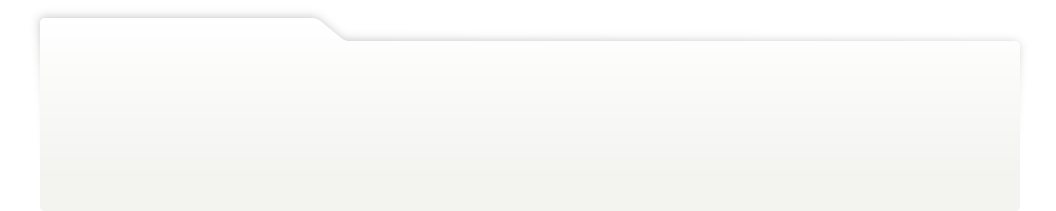
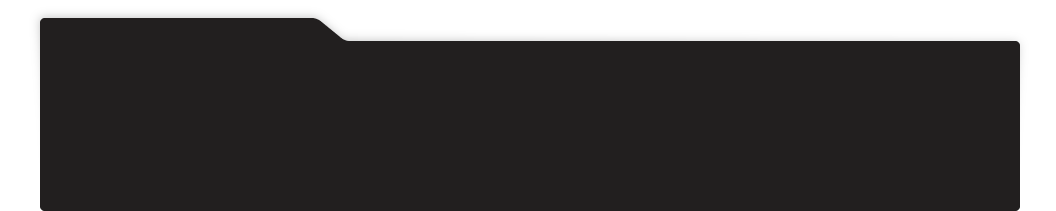
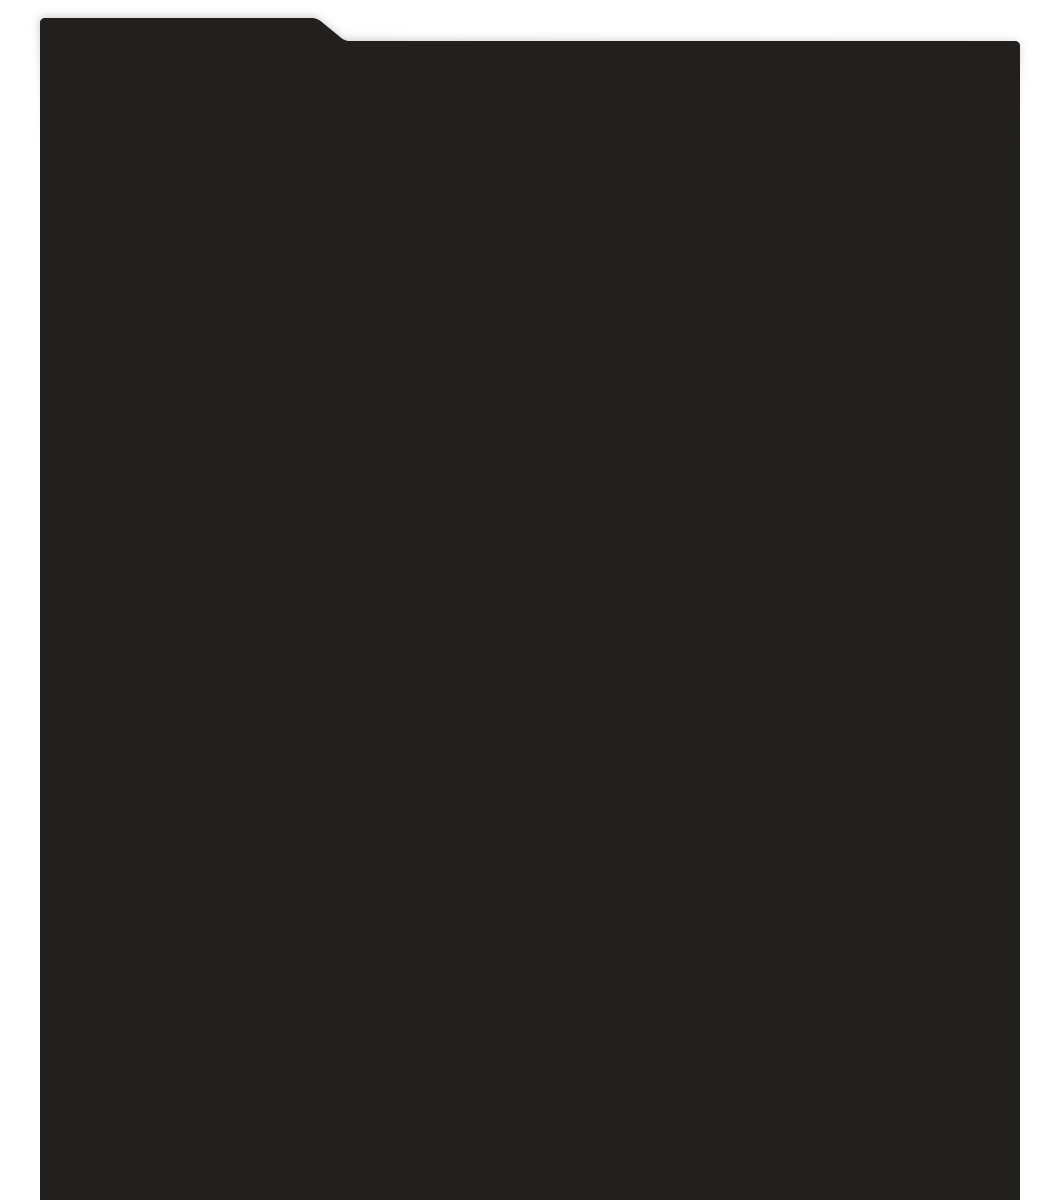
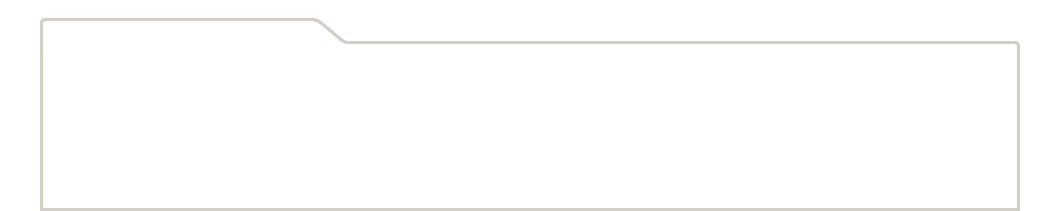
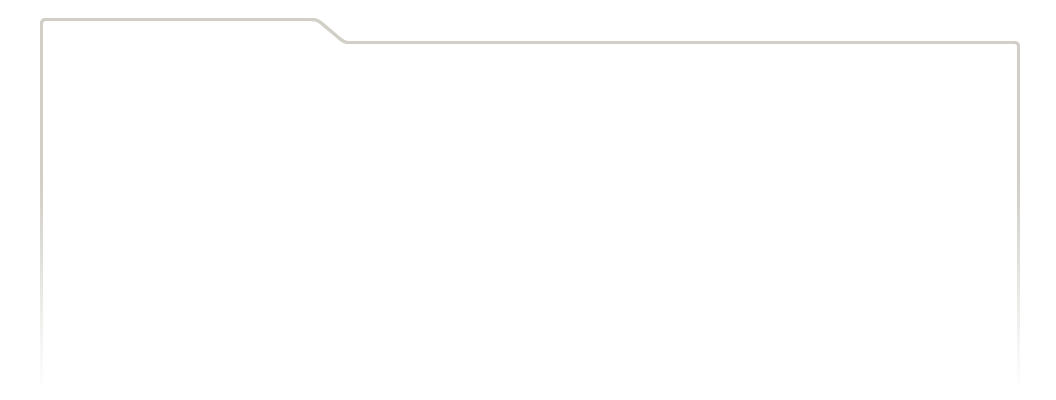
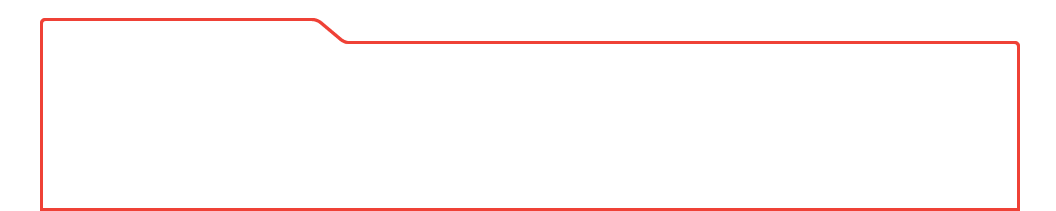
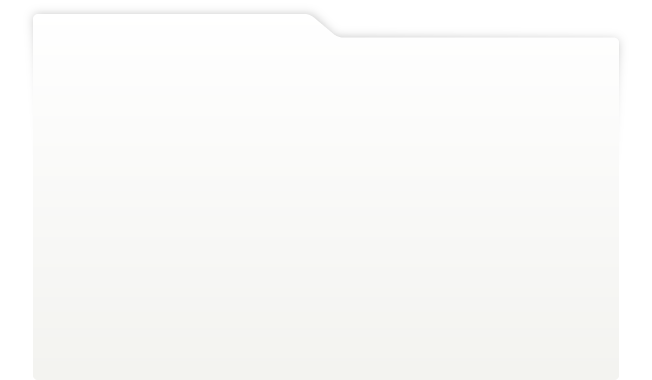
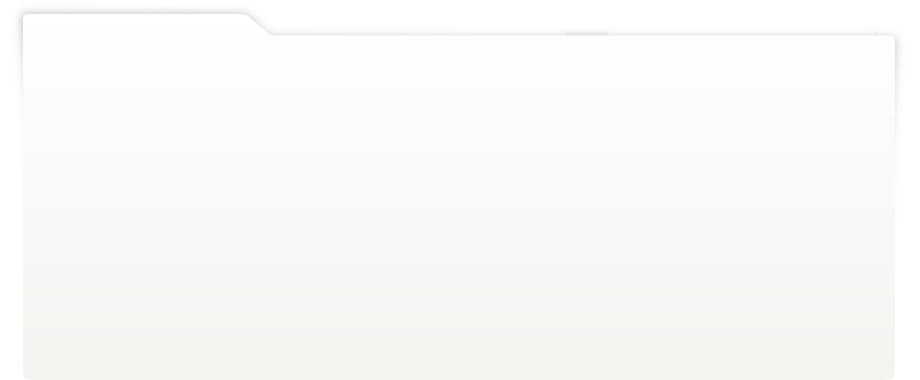
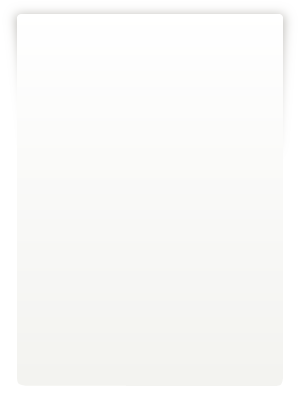
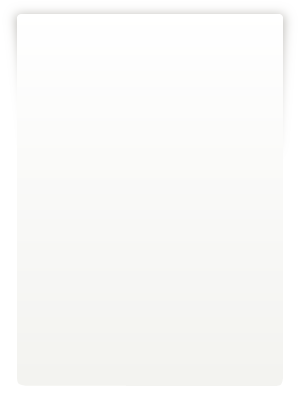
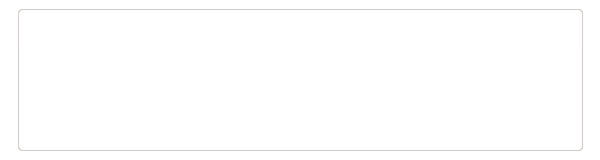
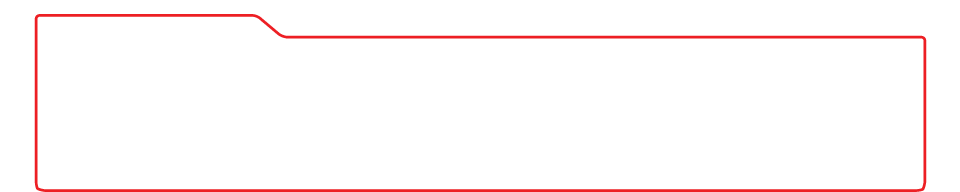
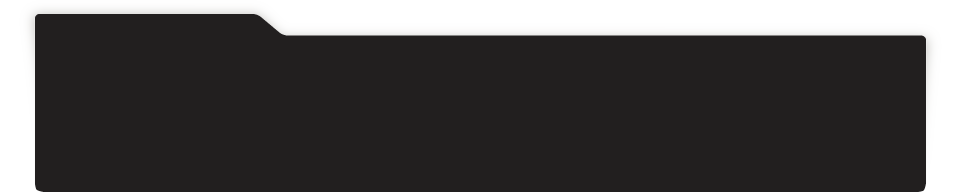
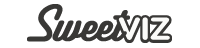
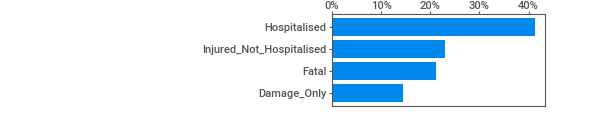
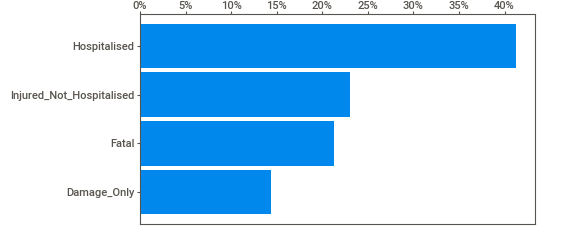
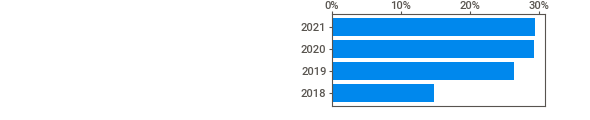
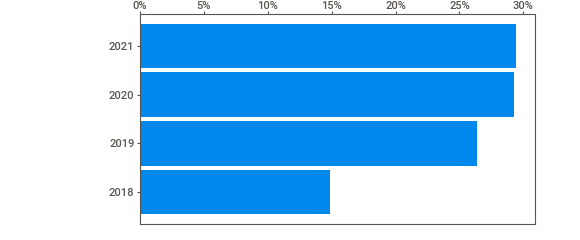
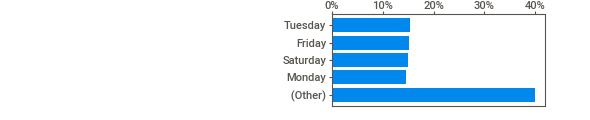
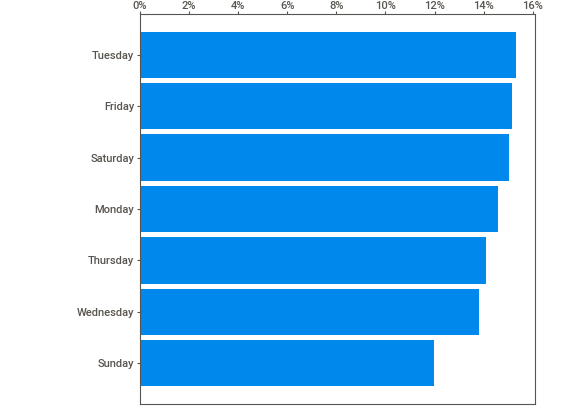
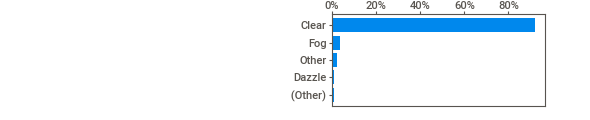
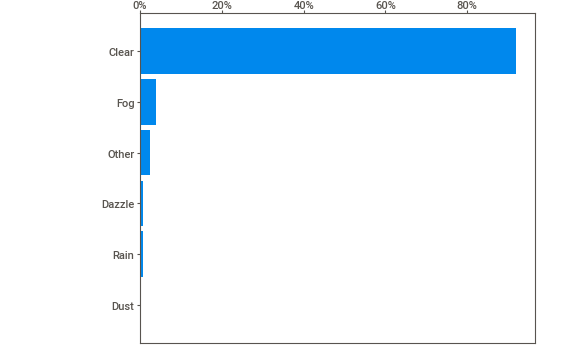
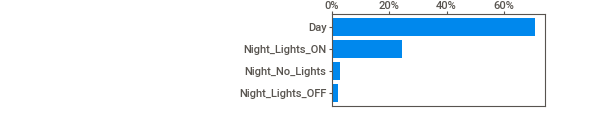
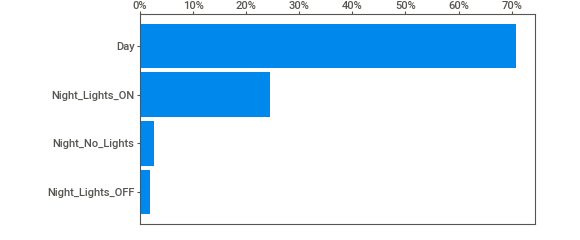
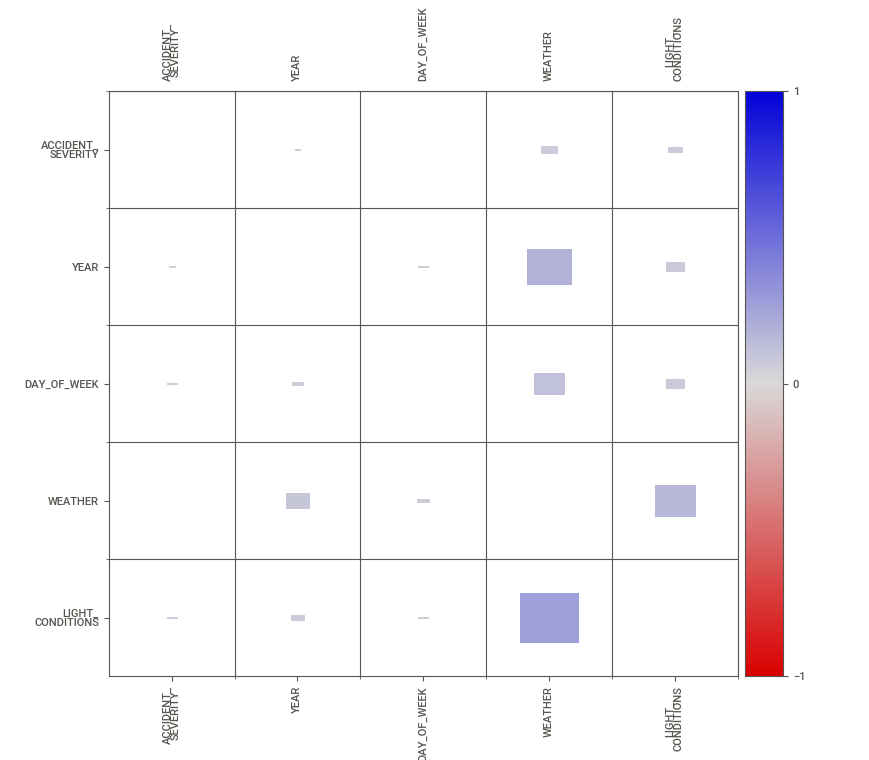
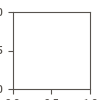

In [ ]:
#EDA
eda_data=sv.analyze(dataset2)
eda_data.show_notebook(layout="vertical",w=900,h=700,scale=0.8)

In [ ]:
#Splitting data into train and test data
data2 = dataset2.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen2 = dataset2.drop(data2.index).reset_index(drop=True)
print('Data for Modeling: ' + str(data2.shape))
print('Unseen Data For Predictions: ' + str(data_unseen2.shape))

Data for Modeling: (593, 6)
Unseen Data For Predictions: (66, 6)


In [ ]:
#setting up environment
exp_mclf1012 = setup(data = data2, target = 'ACCIDENT_SEVERITY', session_id=123)

,Description,Value
0,Session id,123
1,Target,ACCIDENT_SEVERITY
2,Target type,Multiclass
3,Target mapping,"Damage_Only: 0, Fatal: 1, Hospitalised: 2, Injured_Not_Hospitalised: 3"
4,Original data shape,"(593, 6)"
5,Transformed data shape,"(593, 20)"
6,Transformed train set shape,"(415, 20)"
7,Transformed test set shape,"(178, 20)"
8,Numeric features,1
9,Categorical features,4


In [ ]:
#Compare models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.4192,0.5000,0.4192,0.1758,0.2477,0.0000,0.0000,0.2860
lr,Logistic Regression,0.4095,0.5329,0.4095,0.3038,0.2893,0.0234,0.0426,0.3790
lda,Linear Discriminant Analysis,0.3951,0.5302,0.3951,0.2598,0.2819,0.0108,0.0045,0.2900
ridge,Ridge Classifier,0.3949,0.0000,0.3949,0.3257,0.3007,0.0273,0.0441,0.4790
qda,Quadratic Discriminant Analysis,0.3930,0.0000,0.3930,0.1615,0.2280,0.0000,0.0000,0.4260
et,Extra Trees Classifier,0.3757,0.5081,0.3757,0.2649,0.2867,0.0058,0.0048,0.9690
rf,Random Forest Classifier,0.3733,0.5008,0.3733,0.2580,0.2784,-0.0052,-0.0127,0.7440
knn,K Neighbors Classifier,0.3713,0.4769,0.3713,0.2740,0.2882,0.0081,0.0128,0.5060
nb,Naive Bayes,0.3613,0.5283,0.3613,0.3092,0.2732,0.0281,0.0310,0.2900
dt,Decision Tree Classifier,0.3544,0.4959,0.3544,0.2488,0.2554,-0.0087,-0.0172,0.2890


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
#Creating the model
lr1 = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4524,0.5949,0.4524,0.3786,0.3038,0.0511,0.1631
1,0.4524,0.6259,0.4524,0.3822,0.3364,0.0782,0.1314
2,0.3810,0.5644,0.3810,0.2432,0.2766,-0.0168,-0.0225
3,0.4048,0.4675,0.4048,0.1821,0.2512,-0.0214,-0.0494
4,0.4048,0.4803,0.4048,0.2513,0.2801,0.0481,0.0701
5,0.4390,0.5690,0.4390,0.4038,0.3302,0.0818,0.1254
6,0.3902,0.5331,0.3902,0.3876,0.2743,-0.0029,-0.0050
7,0.3659,0.4203,0.3659,0.3232,0.2851,-0.0221,-0.0296
8,0.4146,0.5487,0.4146,0.3110,0.3143,0.0538,0.0725


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lr1 = tune_model(lr1,choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4524,0.5886,0.4524,0.4262,0.3048,0.0492,0.1568
1,0.4286,0.5420,0.4286,0.1837,0.2571,0.0000,0.0000
2,0.4048,0.5390,0.4048,0.1777,0.2470,-0.0335,-0.1066
3,0.4524,0.4620,0.4524,0.4262,0.3048,0.0492,0.1568
4,0.3810,0.4829,0.3810,0.1661,0.2313,-0.0196,-0.0387
5,0.4146,0.5813,0.4146,0.1719,0.2431,0.0000,0.0000
6,0.4146,0.5049,0.4146,0.1719,0.2431,0.0000,0.0000
7,0.4634,0.3985,0.4634,0.4003,0.3316,0.0980,0.2271
8,0.3902,0.5056,0.3902,0.2167,0.2661,-0.0010,-0.0015


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
#Prediction on trian data
predict_model(tuned_lr1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.3820,0.5137,0.3820,0.1644,0.2298,-0.0461,-0.1261


,DATE,YEAR,DAY_OF_WEEK,WEATHER,LIGHT_CONDITIONS,ACCIDENT_SEVERITY,prediction_label,prediction_score
150,22-Sep-19,2019,Sunday,Clear,Night_Lights_ON,2,Hospitalised,0.4006
583,25-Feb-21,2021,Thursday,Clear,Night_Lights_ON,3,Hospitalised,0.4200
341,30-May-20,2020,Saturday,Clear,Day,3,Hospitalised,0.3784
364,2-Dec-21,2021,Thursday,Clear,Day,0,Hospitalised,0.4416
350,11-Oct-19,2019,Friday,Clear,Day,3,Hospitalised,0.4630
...,...,...,...,...,...,...,...,...
166,12-Oct-21,2021,Tuesday,Clear,Day,1,Hospitalised,0.4931
8,12-Oct-18,2018,Friday,Clear,Day,2,Hospitalised,0.4630
1,29-Dec-19,2019,Sunday,Clear,Day,1,Hospitalised,0.4190
523,24-Oct-21,2021,Sunday,Fog,Night_Lights_OFF,2,Fatal,0.3605


In [ ]:
#Prediction on test data
unseen_predictions2 = predict_model(tuned_lr1, data=data_unseen2)
unseen_predictions2.head()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.3333,0,0.3333,0.1111,0.1667,0.0000,0.0000


,DATE,YEAR,DAY_OF_WEEK,WEATHER,LIGHT_CONDITIONS,ACCIDENT_SEVERITY,prediction_label,prediction_score
0,9-Mar-21,2021,Tuesday,Clear,Night_Lights_ON,3,Hospitalised,0.4750
1,14-May-21,2021,Friday,Clear,Day,3,Hospitalised,0.4742
2,25-Oct-21,2021,Monday,Clear,Night_Lights_ON,1,Hospitalised,0.3404
3,2-Apr-21,2021,Friday,Clear,Day,1,Hospitalised,0.4630
4,8-Aug-21,2021,Sunday,Clear,Night_Lights_ON,2,Hospitalised,0.4028


In [ ]:
evaluate_model(tuned_lr1)

##Objective 2: Effect of time variation on injury severity

In [ ]:
#Import dataset
dataset2 = get_data('AboboyaaAccidentObj2')

,ACCIDENT_SEVERITY,DATE,MONTH,YEAR,DAY,DAY_OF_WEEK,WEATHER,LIGHT_CONDITIONS
0,Injured_Not_Hospitalised,22-Oct-18,October,2018,22,Monday,Clear,Day
1,Damage_Only,7-Apr-18,April,2018,7,Saturday,Clear,Night_Lights_ON
2,Hospitalised,21-Aug-18,August,2018,21,Tuesday,Clear,Night_Lights_ON
3,Hospitalised,7-Jan-18,January,2018,7,Sunday,Clear,Day
4,Hospitalised,9-Mar-18,March,2018,9,Friday,Clear,Day


In [ ]:
#sns.catplot(data=dataset2, x="YEAR", y="ACCIDENT_SEVERITY", hue="LIGHT_CONDITIONS", kind="bar")

CrosstabResult=pd.crosstab(index=dataset2["ACCIDENT_SEVERITY"],columns=dataset2["LIGHT_CONDITIONS"])

<Axes: xlabel='ACCIDENT_SEVERITY'>

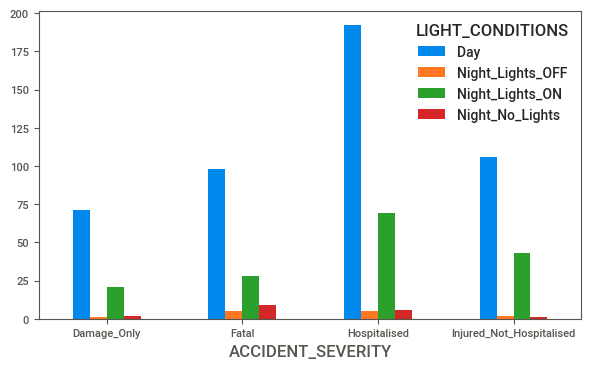

In [ ]:
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

In [ ]:
CrosstabResult2=pd.crosstab(index=dataset2["ACCIDENT_SEVERITY"],columns=dataset2["WEATHER"])

<Axes: xlabel='ACCIDENT_SEVERITY'>

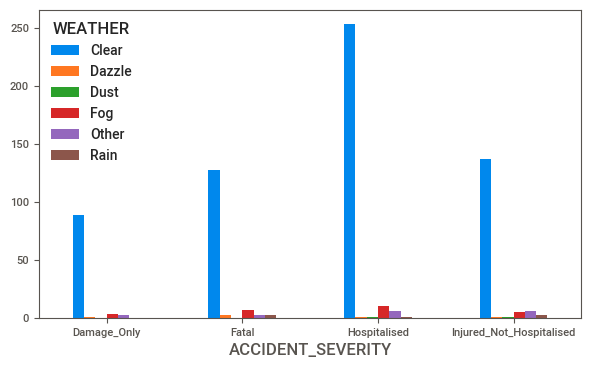

In [ ]:
CrosstabResult2.plot.bar(figsize=(7,4), rot=0)

##Objective 3 : Effect of Road Surface Type on injury severity

In [ ]:
#Import dataset
dataset3 = get_data('AboboyaaAccidentObj3')

,ACCIDENT_SEVERITY,ROAD_SURFACE TYPE,SHOULDER_TYPE,SHOULDER_CONDITION,SURFACE_CONDITION,SURFACE_REPAIR
0,Injured_Not_Hospitalised,Tar Good,Tarred,Good,Dry,Good
1,Damage_Only,Tar Good,Tarred,Good,Dry,Good
2,Hospitalised,Tar Good,Tarred,Good,Dry,Potholes
3,Hospitalised,Tar Good,Tarred,Good,Dry,Good
4,Hospitalised,Tar many Potholes,No Shoulder,No Shoulder,Dry,Potholes


In [ ]:
#Subsetting some features
dataset2=dataset2[['ACCIDENT_SEVERITY','DATE','YEAR','DAY_OF_WEEK','WEATHER','LIGHT_CONDITIONS']]

In [ ]:
#check the shape of data
dataset3.shape

(659, 6)

In [ ]:
#Dataset Features
dataset3.dtypes

ACCIDENT_SEVERITY     object
ROAD_SURFACE TYPE     object
SHOULDER_TYPE         object
SHOULDER_CONDITION    object
SURFACE_CONDITION     object
SURFACE_REPAIR        object
dtype: object

In [ ]:
#Check for missing values
print(dataset3.isnull().sum())

ACCIDENT_SEVERITY     0
ROAD_SURFACE TYPE     0
SHOULDER_TYPE         0
SHOULDER_CONDITION    0
SURFACE_CONDITION     4
SURFACE_REPAIR        0
dtype: int64


                                             |          | [  0%]   00:00 -> (? left)


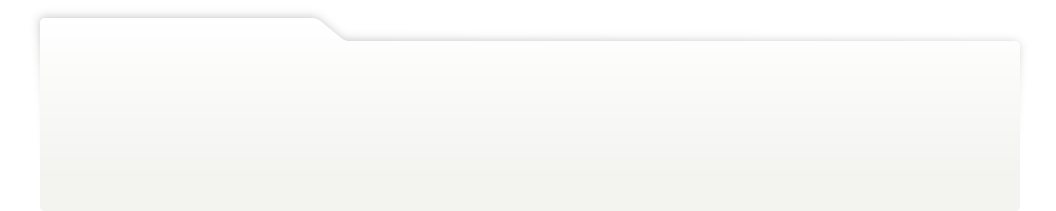
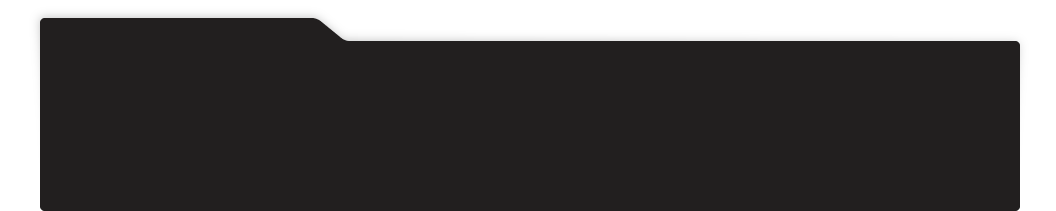
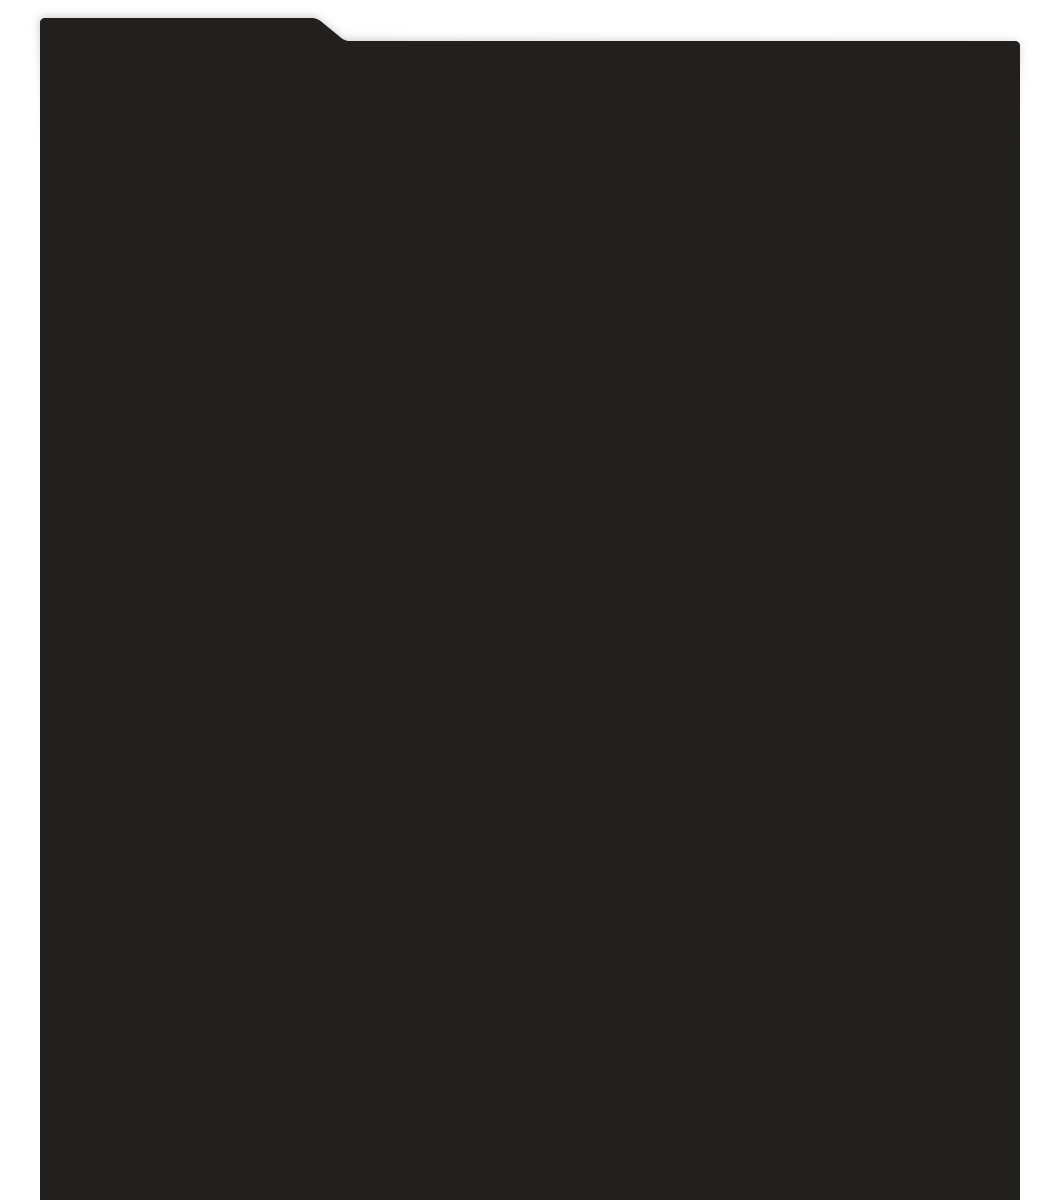
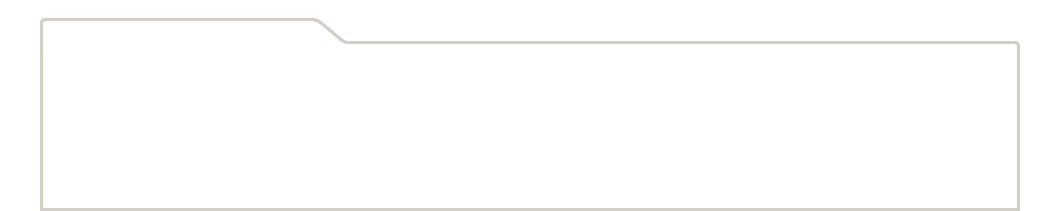
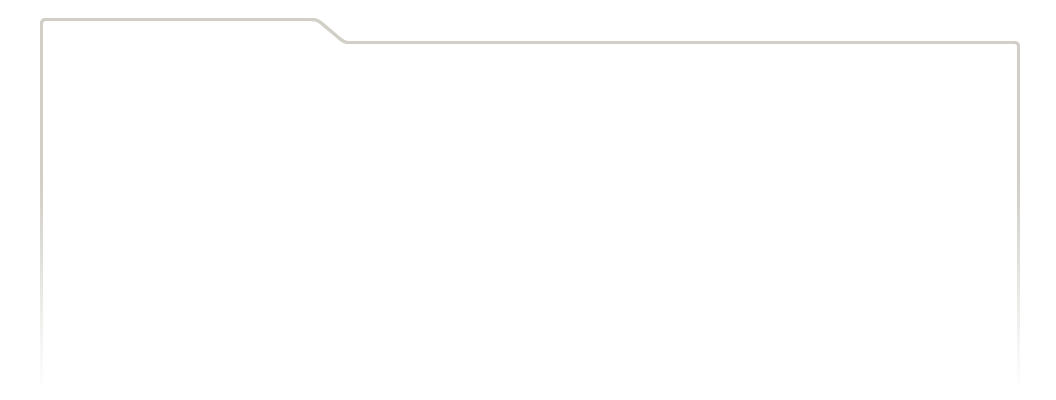
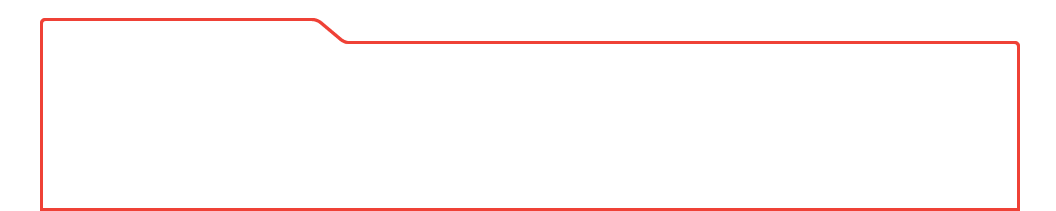
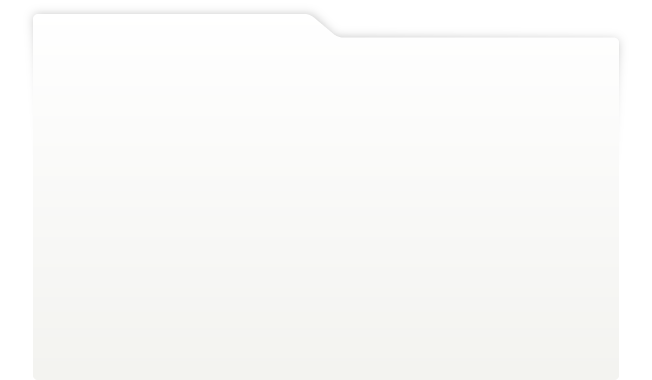
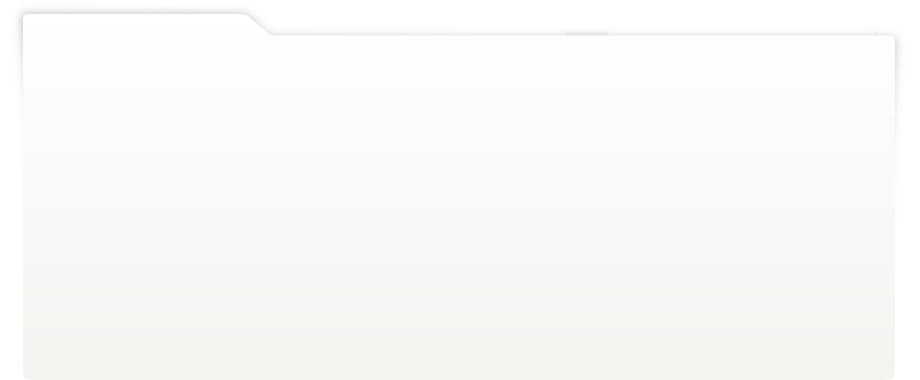
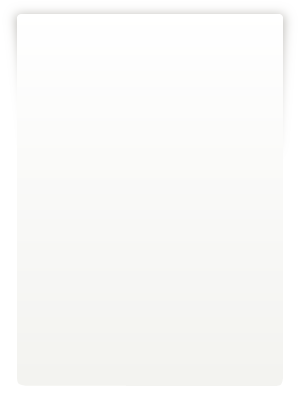
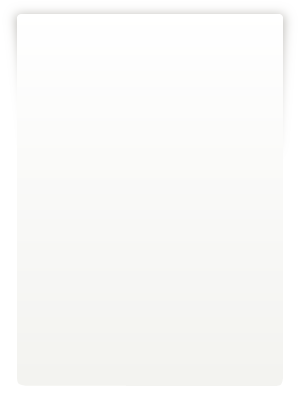
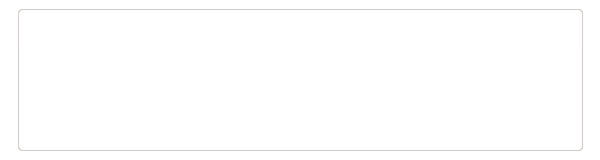
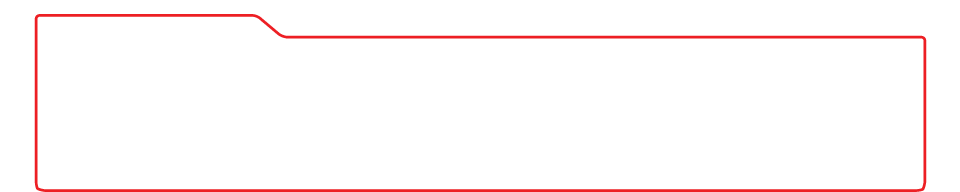
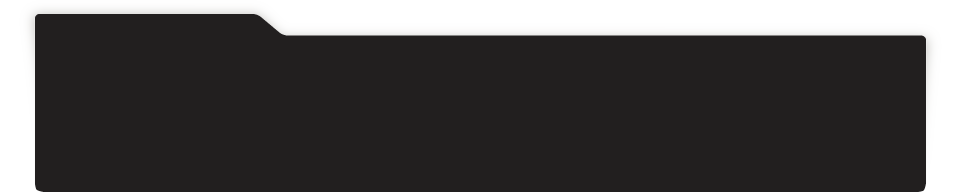
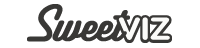
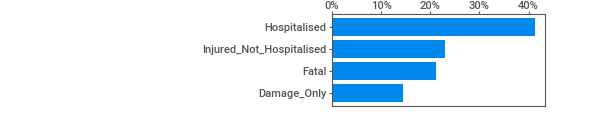
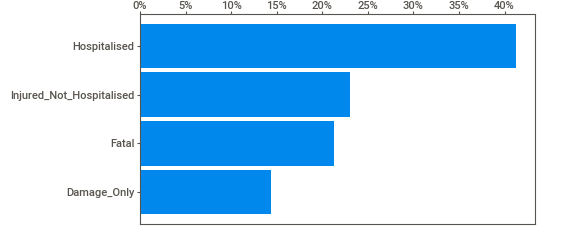
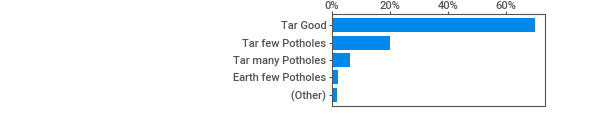
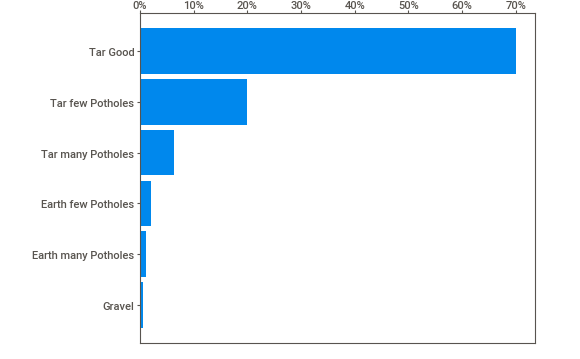
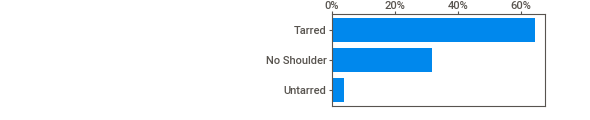
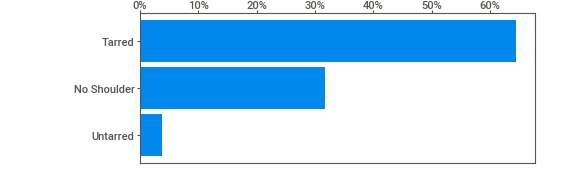
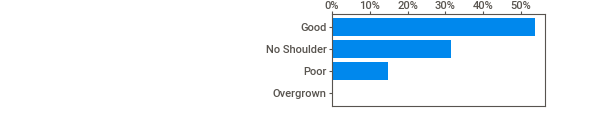
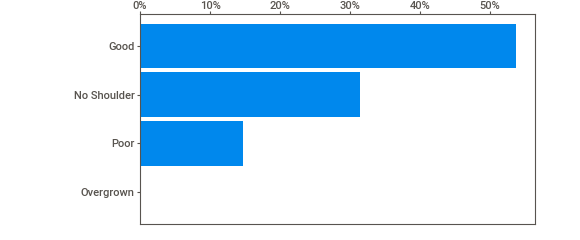
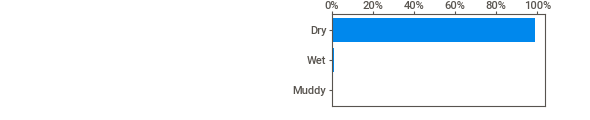
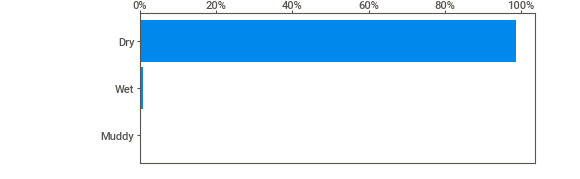
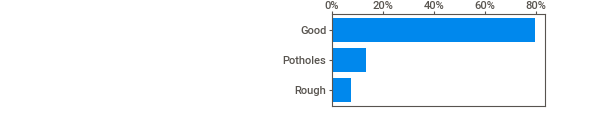
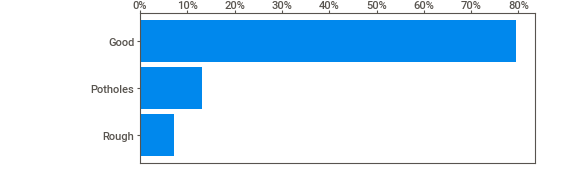
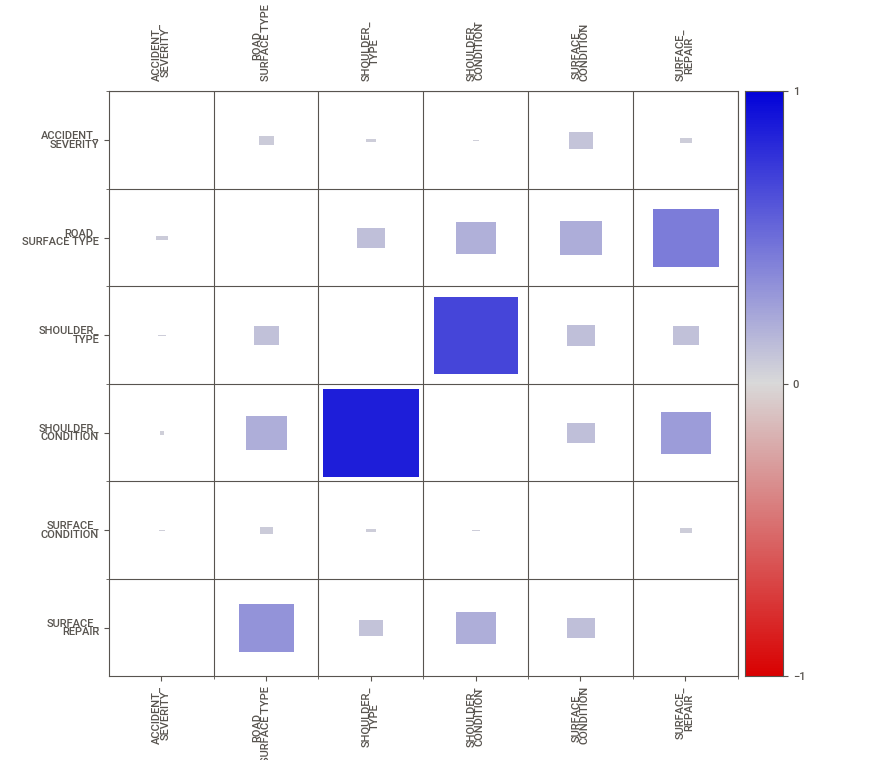
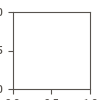

In [ ]:
#EDA
eda_data=sv.analyze(dataset3)
eda_data.show_notebook(layout="vertical",w=900,h=700,scale=0.8)

In [ ]:
#Splitting data into train and test data
data3 = dataset3.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen3 = dataset3.drop(data3.index).reset_index(drop=True)
print('Data for Modeling: ' + str(data3.shape))
print('Unseen Data For Predictions: ' + str(data_unseen3.shape))

Data for Modeling: (593, 6)
Unseen Data For Predictions: (66, 6)


In [ ]:
#setting up environment
exp_mclf1012 = setup(data = data3, target = 'ACCIDENT_SEVERITY', session_id=123)

,Description,Value
0,Session id,123
1,Target,ACCIDENT_SEVERITY
2,Target type,Multiclass
3,Target mapping,"Damage_Only: 0, Fatal: 1, Hospitalised: 2, Injured_Not_Hospitalised: 3"
4,Original data shape,"(593, 6)"
5,Transformed data shape,"(593, 20)"
6,Transformed train set shape,"(415, 20)"
7,Transformed test set shape,"(178, 20)"
8,Categorical features,5
9,Rows with missing values,0.3%


In [ ]:
#Compare models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.4243,0.5341,0.4243,0.2796,0.2924,0.0367,0.0685,0.3270
dummy,Dummy Classifier,0.4192,0.5000,0.4192,0.1758,0.2477,0.0000,0.0000,0.2800
ridge,Ridge Classifier,0.4170,0.0000,0.4170,0.2622,0.2889,0.0320,0.0537,0.3720
ada,Ada Boost Classifier,0.4074,0.5212,0.4074,0.2752,0.2917,0.0295,0.0509,0.7390
lightgbm,Light Gradient Boosting Machine,0.4048,0.5215,0.4048,0.3041,0.2989,0.0324,0.0547,0.3440
rf,Random Forest Classifier,0.3927,0.5234,0.3927,0.3042,0.2892,0.0131,0.0185,0.7860
lda,Linear Discriminant Analysis,0.3904,0.5280,0.3904,0.2506,0.2785,0.0025,0.0029,0.2690
knn,K Neighbors Classifier,0.3858,0.4696,0.3858,0.2653,0.2812,0.0084,0.0135,0.5690
xgboost,Extreme Gradient Boosting,0.3854,0.5166,0.3854,0.3188,0.2900,0.0095,0.0193,0.6900
gbc,Gradient Boosting Classifier,0.3830,0.5208,0.3830,0.2885,0.2869,0.0076,0.0141,1.3960


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
#Creating the model
lr2 = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4524,0.5250,0.4524,0.2881,0.3041,0.0603,0.1392
1,0.3810,0.5012,0.3810,0.1805,0.2449,-0.0480,-0.0806
2,0.4286,0.4989,0.4286,0.1882,0.2615,0.0079,0.0251
3,0.3571,0.4135,0.3571,0.2190,0.2582,-0.0618,-0.0830
4,0.4048,0.6091,0.4048,0.2375,0.2670,0.0223,0.0442
5,0.4390,0.5783,0.4390,0.2953,0.2962,0.0645,0.1235
6,0.4634,0.5489,0.4634,0.4770,0.3668,0.1191,0.1831
7,0.4146,0.5065,0.4146,0.1762,0.2473,0.0081,0.0259
8,0.4634,0.5862,0.4634,0.4100,0.3409,0.1122,0.1892


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lr2 = tune_model(lr2,choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4286,0.5396,0.4286,0.1837,0.2571,0.0000,0.0000
1,0.4286,0.5028,0.4286,0.1837,0.2571,0.0000,0.0000
2,0.4286,0.4990,0.4286,0.1882,0.2615,0.0079,0.0251
3,0.4286,0.4103,0.4286,0.1837,0.2571,0.0000,0.0000
4,0.4048,0.6213,0.4048,0.1638,0.2333,0.0000,0.0000
5,0.4146,0.5706,0.4146,0.1719,0.2431,0.0000,0.0000
6,0.4146,0.5139,0.4146,0.1719,0.2431,0.0000,0.0000
7,0.4146,0.4790,0.4146,0.1719,0.2431,0.0000,0.0000
8,0.4146,0.6876,0.4146,0.1719,0.2431,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
#Prediction on trian data
predict_model(tuned_lr2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.4045,0.4688,0.4045,0.3269,0.2671,0.0008,0.0016


,ROAD_SURFACE TYPE,SHOULDER_TYPE,SHOULDER_CONDITION,SURFACE_CONDITION,SURFACE_REPAIR,ACCIDENT_SEVERITY,prediction_label,prediction_score
150,Tar Good,Tarred,Good,Dry,Good,2,Hospitalised,0.4344
583,Tar Good,No Shoulder,No Shoulder,Dry,Good,3,Hospitalised,0.3244
341,Tar Good,Tarred,Good,Dry,Good,3,Hospitalised,0.4344
364,Tar many Potholes,No Shoulder,No Shoulder,Dry,Potholes,0,Hospitalised,0.4655
350,Tar Good,No Shoulder,No Shoulder,Dry,Good,3,Hospitalised,0.3244
...,...,...,...,...,...,...,...,...
166,Tar Good,Tarred,Good,Dry,Good,1,Hospitalised,0.4344
8,Tar Good,Tarred,Good,Dry,Good,2,Hospitalised,0.4344
1,Tar Good,No Shoulder,No Shoulder,Dry,Good,1,Hospitalised,0.3244
523,Tar few Potholes,No Shoulder,No Shoulder,Dry,Potholes,2,Hospitalised,0.5699


In [ ]:
#Prediction on test data
unseen_predictions3 = predict_model(tuned_lr2, data=data_unseen3)
unseen_predictions3.head()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.3485,0,0.3485,0.2509,0.1978,0.0254,0.0829


,ROAD_SURFACE TYPE,SHOULDER_TYPE,SHOULDER_CONDITION,SURFACE_CONDITION,SURFACE_REPAIR,ACCIDENT_SEVERITY,prediction_label,prediction_score
0,Tar Good,Tarred,Good,Dry,Good,3,Hospitalised,0.4344
1,Tar Good,No Shoulder,No Shoulder,Dry,Good,3,Hospitalised,0.3244
2,Tar Good,No Shoulder,No Shoulder,Dry,Good,1,Hospitalised,0.3244
3,Tar Good,Tarred,Good,Dry,Good,1,Hospitalised,0.4344
4,Tar Good,No Shoulder,No Shoulder,Dry,Good,2,Hospitalised,0.3244


In [ ]:
evaluate_model(tuned_lr2)

##Objective 4 : Effect of collision resulting on injury severity

In [ ]:
#Import dataset
dataset4 = get_data('AboboyaaAccidentObj4')

,ACCIDENT_SEVERITY,NO_CASUALTIES_KILLED,NO_CASUALTIES_INJURED,COLLISION_TYPE
0,Injured_Not_Hospitalised,0,2.0,Right Angle
1,Damage_Only,0,0.0,Hit parked vehicle
2,Hospitalised,0,2.0,Head on
3,Hospitalised,0,1.0,Hit Pedestrian
4,Hospitalised,0,2.0,Head on


In [ ]:
#check the shape of data
dataset4.shape

(659, 4)

In [ ]:
#Dataset Features
dataset4.dtypes

ACCIDENT_SEVERITY         object
NO_CASUALTIES_KILLED       int64
NO_CASUALTIES_INJURED    float64
COLLISION_TYPE            object
dtype: object

In [ ]:
#Check for missing values
print(dataset4.isnull().sum())

ACCIDENT_SEVERITY        0
NO_CASUALTIES_KILLED     0
NO_CASUALTIES_INJURED    0
COLLISION_TYPE           0
dtype: int64


                                             |          | [  0%]   00:00 -> (? left)


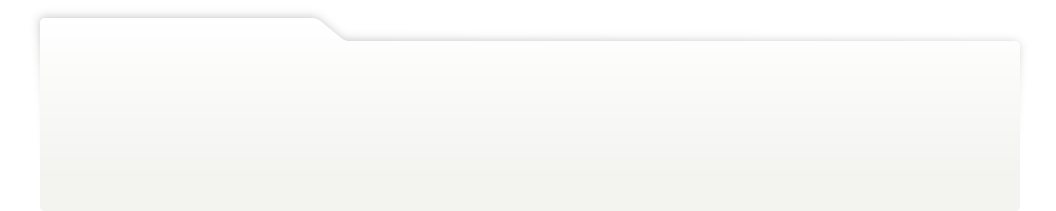
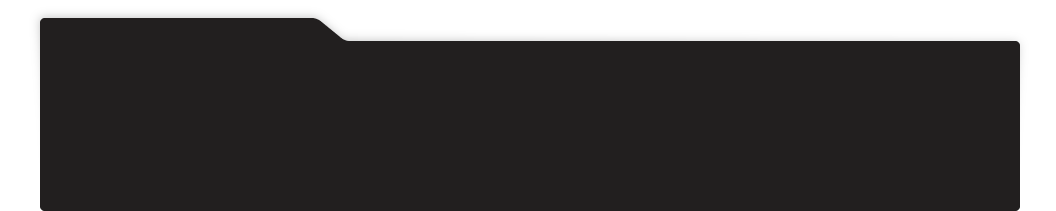
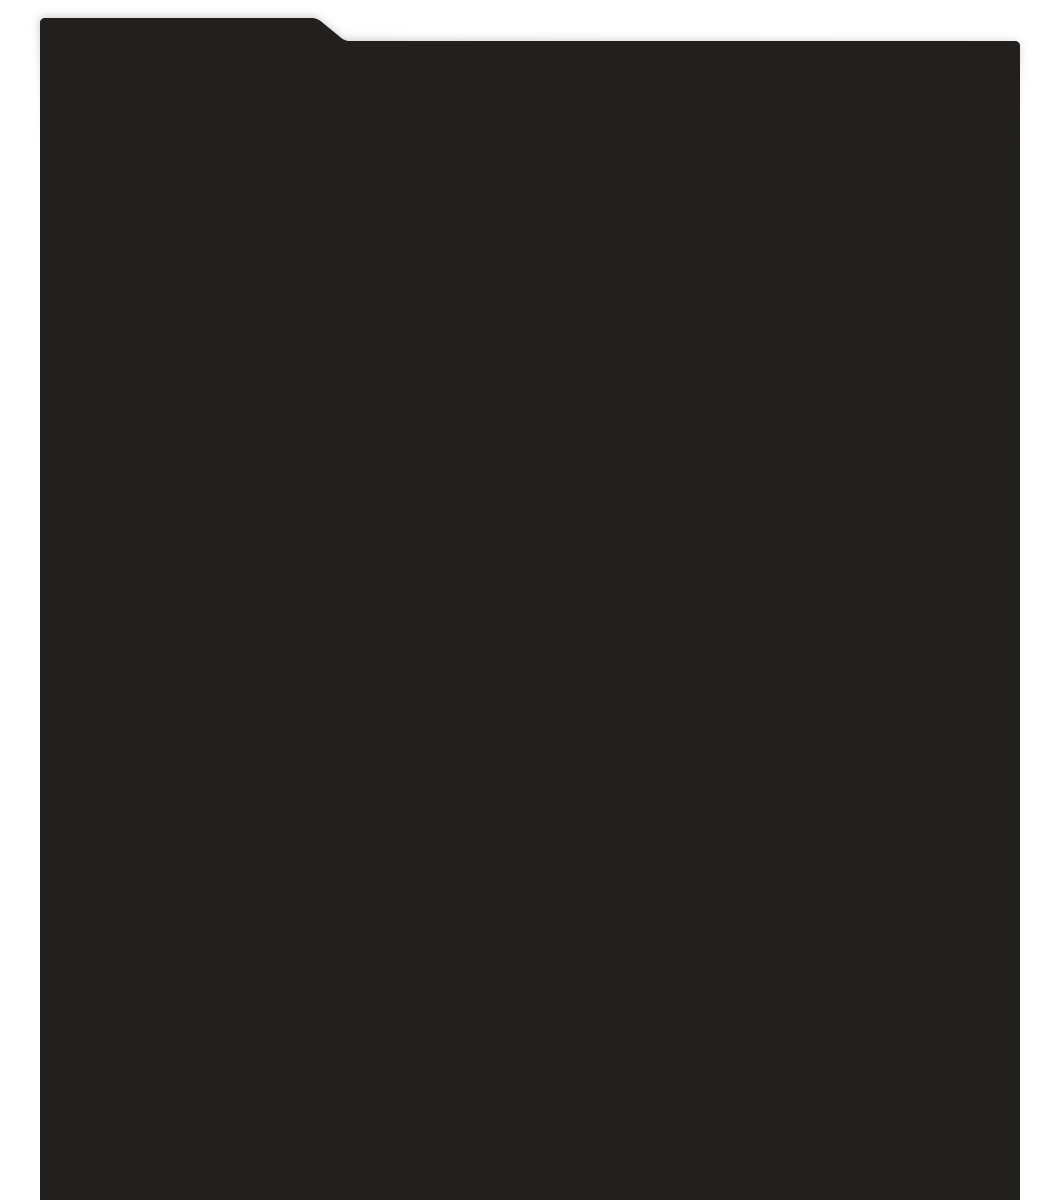
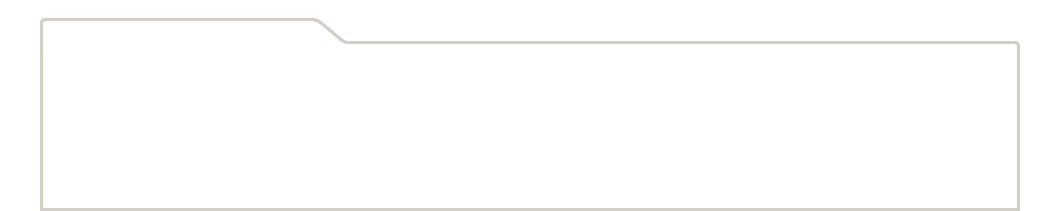
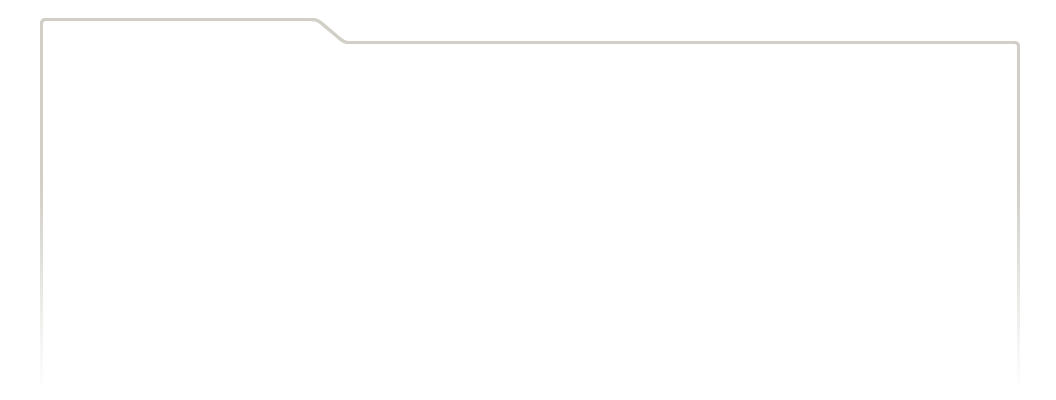
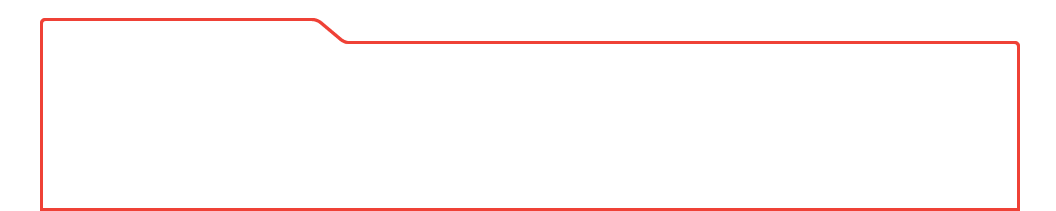
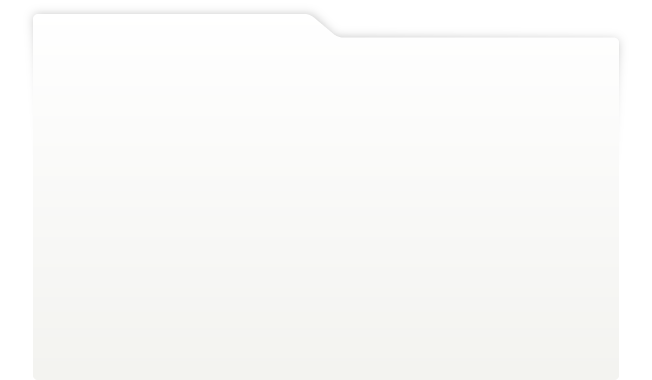
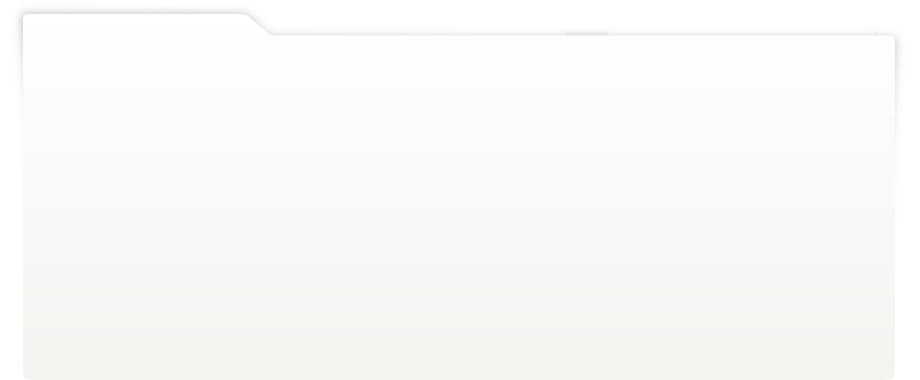
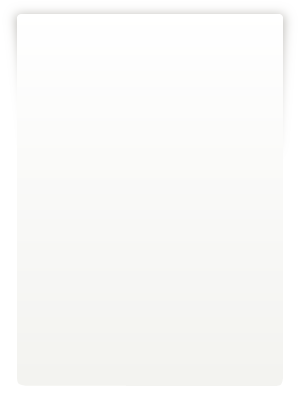
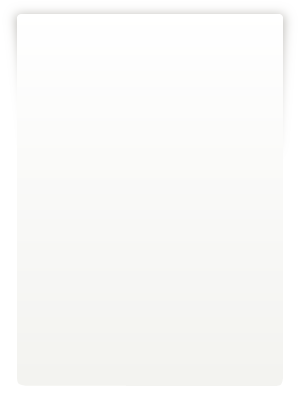
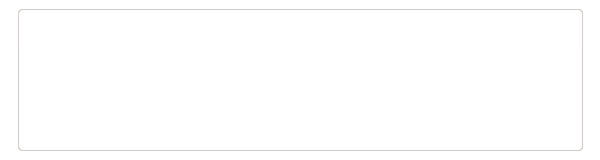
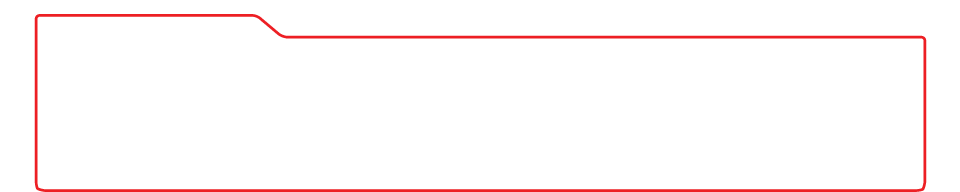
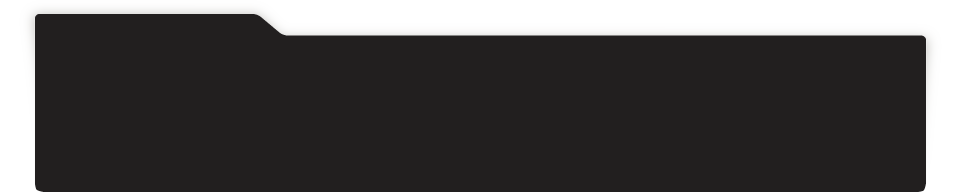
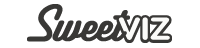
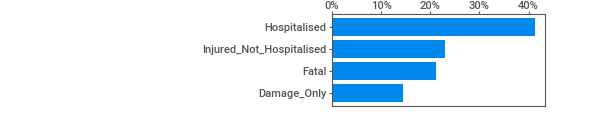
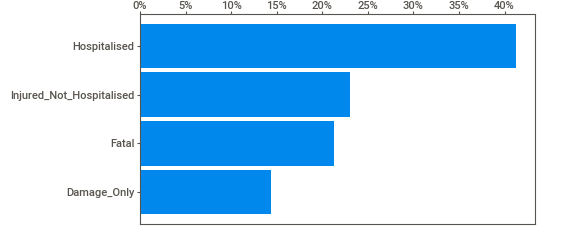
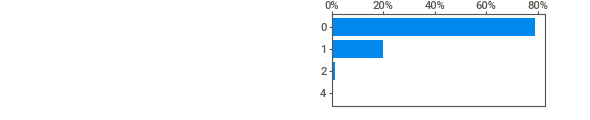
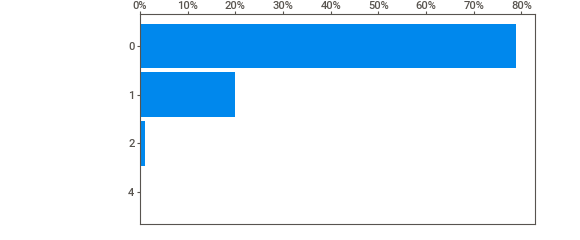
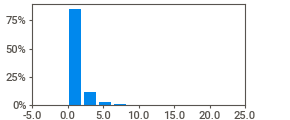
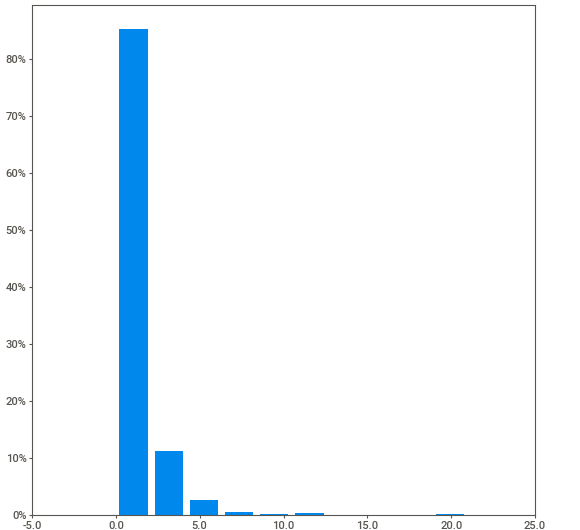
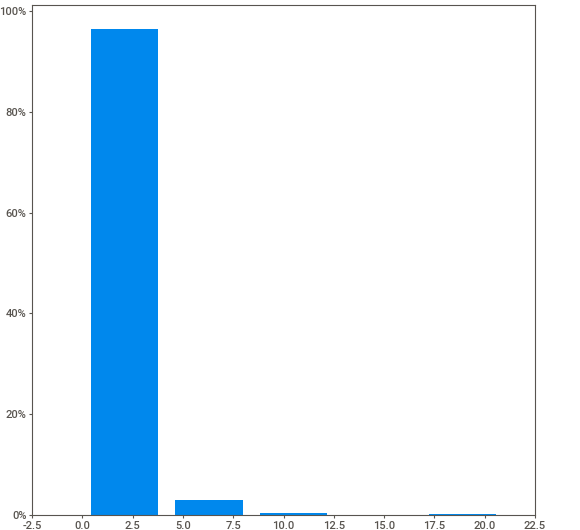
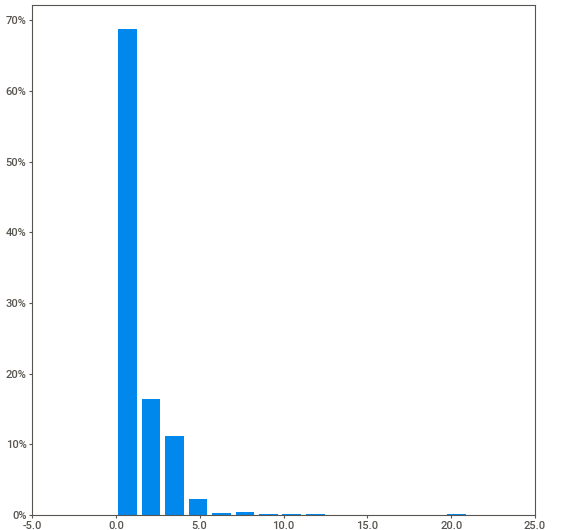
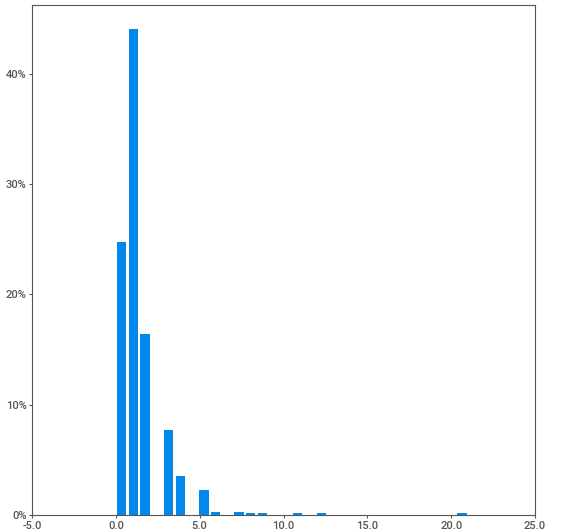
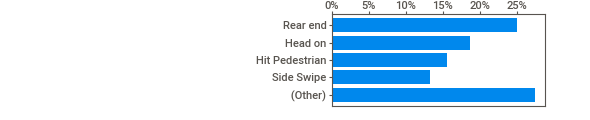
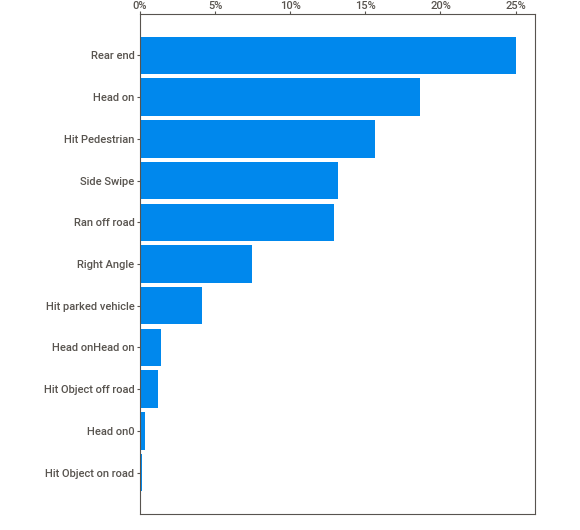
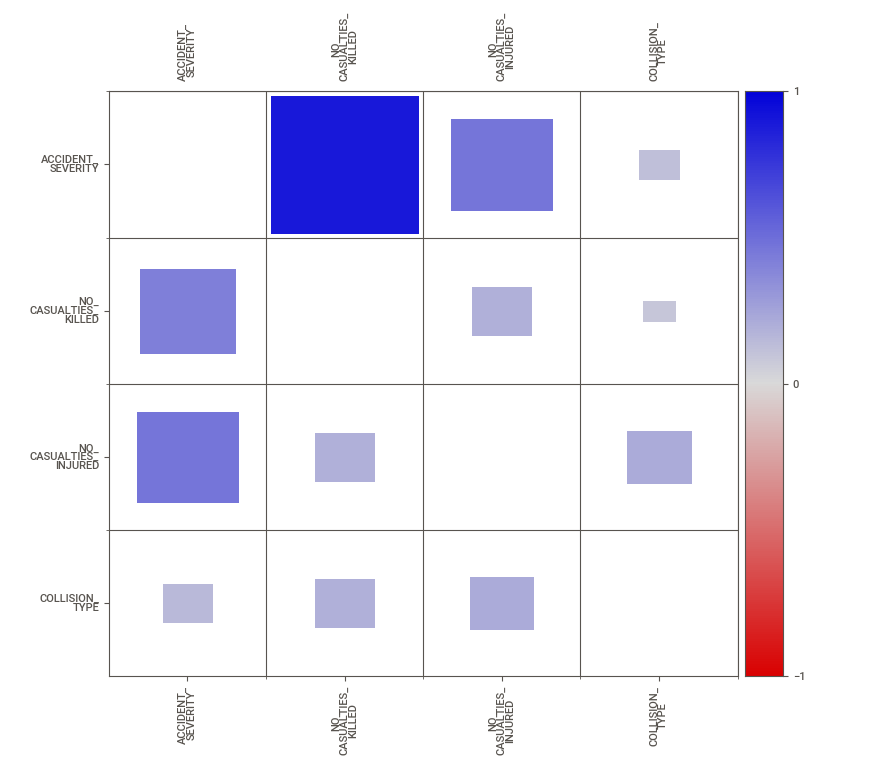
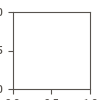

In [ ]:
#EDA
eda_data=sv.analyze(dataset4)
eda_data.show_notebook(layout="vertical",w=900,h=700,scale=0.8)

In [ ]:
#Splitting data into train and test data
data4 = dataset4.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen4 = dataset4.drop(data4.index).reset_index(drop=True)
print('Data for Modeling: ' + str(data4.shape))
print('Unseen Data For Predictions: ' + str(data_unseen4.shape))

Data for Modeling: (593, 4)
Unseen Data For Predictions: (66, 4)


In [ ]:
#setting up environment
exp_mclf1012 = setup(data = data4, target = 'ACCIDENT_SEVERITY', session_id=123)

,Description,Value
0,Session id,123
1,Target,ACCIDENT_SEVERITY
2,Target type,Multiclass
3,Target mapping,"Damage_Only: 0, Fatal: 1, Hospitalised: 2, Injured_Not_Hospitalised: 3"
4,Original data shape,"(593, 4)"
5,Transformed data shape,"(593, 13)"
6,Transformed train set shape,"(415, 13)"
7,Transformed test set shape,"(178, 13)"
8,Numeric features,2
9,Categorical features,1


In [ ]:
#Compare models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7637,0.8908,0.7637,0.7269,0.7353,0.6566,0.6745,0.3860
xgboost,Extreme Gradient Boosting,0.7420,0.8614,0.7420,0.7206,0.7201,0.6273,0.6405,0.5450
lightgbm,Light Gradient Boosting Machine,0.7397,0.8695,0.7397,0.6938,0.7089,0.6215,0.6396,0.3490
gbc,Gradient Boosting Classifier,0.7373,0.8656,0.7373,0.6923,0.7068,0.6190,0.6372,1.3500
svm,SVM - Linear Kernel,0.7351,0.0000,0.7351,0.6804,0.6783,0.6142,0.6598,0.3970
et,Extra Trees Classifier,0.7350,0.8568,0.7350,0.6918,0.7054,0.6146,0.6316,0.7030
dt,Decision Tree Classifier,0.7326,0.8471,0.7326,0.6876,0.7022,0.6124,0.6305,0.2420
nb,Naive Bayes,0.7296,0.8840,0.7296,0.7345,0.7201,0.6291,0.6497,0.2410
rf,Random Forest Classifier,0.7276,0.8611,0.7276,0.6895,0.7007,0.6073,0.6242,0.6280
lda,Linear Discriminant Analysis,0.7203,0.8571,0.7203,0.7137,0.7041,0.5953,0.6051,0.2460


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
#Creating the model
lr3 = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.8880,0.8095,0.8155,0.7823,0.7181,0.7424
1,0.8810,0.9249,0.8810,0.8844,0.8750,0.8273,0.8338
2,0.7143,0.8591,0.7143,0.7081,0.7047,0.5821,0.5889
3,0.7143,0.9090,0.7143,0.6935,0.6996,0.5896,0.5930
4,0.7619,0.9094,0.7619,0.6120,0.6699,0.6465,0.7147
5,0.7561,0.8643,0.7561,0.7561,0.7561,0.6566,0.6566
6,0.7561,0.9113,0.7561,0.7436,0.7476,0.6520,0.6543
7,0.7561,0.8736,0.7561,0.6312,0.6818,0.6372,0.6803
8,0.7317,0.8801,0.7317,0.6846,0.6973,0.6092,0.6237


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lr3 = tune_model(lr3,choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.8880,0.8095,0.8155,0.7823,0.7181,0.7424
1,0.8810,0.9268,0.8810,0.8844,0.8750,0.8273,0.8338
2,0.7143,0.8596,0.7143,0.7081,0.7047,0.5821,0.5889
3,0.7143,0.9077,0.7143,0.6935,0.6996,0.5896,0.5930
4,0.7619,0.9100,0.7619,0.6120,0.6699,0.6465,0.7147
5,0.6829,0.8643,0.6829,0.7056,0.6902,0.5624,0.5666
6,0.7561,0.9096,0.7561,0.7436,0.7476,0.6520,0.6543
7,0.7561,0.8789,0.7561,0.6312,0.6818,0.6372,0.6803
8,0.7317,0.8811,0.7317,0.6846,0.6973,0.6092,0.6237


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
#Prediction on trian data
predict_model(tuned_lr3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7697,0.8809,0.7697,0.7577,0.7598,0.6701,0.6739


,NO_CASUALTIES_KILLED,NO_CASUALTIES_INJURED,COLLISION_TYPE,ACCIDENT_SEVERITY,prediction_label,prediction_score
150,0,3.0,Right Angle,2,Hospitalised,0.6261
583,0,1.0,Side Swipe,3,Hospitalised,0.5373
341,0,1.0,Head on,3,Hospitalised,0.7018
364,0,0.0,Rear end,0,Damage_Only,0.9073
350,0,1.0,Hit Pedestrian,3,Hospitalised,0.7232
...,...,...,...,...,...,...
166,1,3.0,Rear end,1,Fatal,0.8619
8,0,1.0,Hit Pedestrian,2,Hospitalised,0.7232
1,1,0.0,Hit Pedestrian,1,Fatal,0.9403
523,0,1.0,Head on,2,Hospitalised,0.7018


In [ ]:
#Prediction on test data
unseen_predictions4 = predict_model(tuned_lr3, data=data_unseen4)
unseen_predictions4.head()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7576,0.9112,0.7576,0.7657,0.7459,0.6589,0.6731


,NO_CASUALTIES_KILLED,NO_CASUALTIES_INJURED,COLLISION_TYPE,ACCIDENT_SEVERITY,prediction_label,prediction_score
0,0,1.0,Hit Pedestrian,3,Hospitalised,0.7232
1,0,1.0,Right Angle,3,Hospitalised,0.5285
2,1,0.0,Head on,1,Fatal,0.9197
3,1,0.0,Hit Pedestrian,1,Fatal,0.9403
4,0,2.0,Side Swipe,2,Hospitalised,0.6059


In [ ]:
evaluate_model(tuned_lr3)